# Business Understanding

**Author:** Frauke Albrecht


<div>
<img src="Images/800px-Leukemia-_SAG.jpg" width="600"/>
</div> 

Image: Manu Sharma, http://www.scientificanimations.com / CC BY-SA (https://creativecommons.org/licenses/by-sa/4.0)

**Objective:**
Identify the four different blood cells types given in the database.

The analysis of blood samples is important to identify certain deseases and necessary treatments. Leukocytes (white blood cells), are immune system cells that defend the body against infectious disease and foreign materials. An increased or decreased number of leukocytes indicates the presence of a disorder. There are several different types of leukocytes, which share commonalities but are distinct in form and function. Two pairs of broadest categories classify them either by structure (granulocytes or agranulocytes) or by cell lineage (myeloid cells or lymphoid cells). These broadest categories can be further divided into the five main types: neutrophils, eosinophils, basophils, lymphocytes, and monocytes. From which our dataset contains neutrophils, eosinophils, lymphocytes and monotypes.

The dataset contains images of four different types of leukocytes:


|Name      |Type                       |Size (diameter)|Percentage in total number of Leukocytes|Function  |
|:---------|:--------------------------|:--------------|:---------------------------------------|:---------|
|eosinophil|granulocyte/ myeloid       |12–17µm        |1-3%                                    |Responsible for combating multicellular parasites and certain infections; control mechanisms associated with allergy and asthma|
|neutrophil|granulocyte/ myeloid       |12–15µm        |60-70% |Kill bacterias. Migrate toward sites of infection or inflammation|
|lymphocyte|mononuclear leukocyte (agranulocyte)/ lymphoid|6-10µm         |25-40% |Lysis of virally infected cells and tumour cells; Release cytokines and growth factors that regulate other immune cells; Immunoregulation and cytotoxicity; Secretion of antibodies| 
|monocyte  |mononuclear leukocyte (agranulocyte)/ myeloid|12-10µm        |2-10%                                   |Replenishing resident macrophages under normal conditions; migration in response to inflammation signals; differentiation into macrophages or dendritic cells to effect an immune response. |                                                          |



Deseases in contexts with leukocytes:

| Name     | Desease |
|:---------|:--------|
|eosinophil|An increase in eosinophils is typically seen in people with a parasitic infestation of the intestines. **Perhaps the most common cause is an allergic condition such as asthma.** Further disorders in this context: Autoimmune and collagen vascular disease (such as rheumatoid arthritis), systemic lupus erythematosus, eosinophilic leukemia, clonal hypereosinophilia, Hodgkin's disease, lymphocyte-variant hypereosinophilia, extensive skin diseases, Addison's disease and other causes of low corticosteroid production, reflux esophagitis and eosinophilic esophagitis, with the use of certain drugs such as penicillin.|
|neutrophil|High in bacterial infections. Low neutrophil counts can be developed at or before birth or it can develop later, as in the case of aplastic anemia or some kinds of leukemia. It can also be a side-effect of medication, most prominently chemotherapy. Low neutrophil counts makes an individual highly susceptible to infections. It can also be the result of colonization by intracellular neutrophilic parasites.|
|lymphocyte|An increase in lymphocyte concentration is usually a sign of a viral infection. A high lymphocyte count with a low neutrophil count might be caused by lymphoma. A low normal to low absolute lymphocyte concentration is associated with increased rates of infection after surgery or trauma. One basis for low T cell lymphocytes occurs when the human immunodeficiency virus (HIV) infects and destroys T cells. The effects of other viruses or lymphocyte disorders can also often be estimated by counting the numbers of lymphocytes present in the blood.|
|monocyte  |Examples of processes that can increase a monocyte count include: chronic inflammation, stress response, Cushing's syndrome (hyperadrenocorticism), immune-mediated disease, granulomatous disease, atherosclerosis, necrosis, red blood cell regeneration, viral fever, sarcoidosis. A very low count of these cells is found after therapy with immuno-suppressive glucocorticoids.         |





Sources:
* https://en.wikipedia.org/wiki/Eosinophil 
* https://en.wikipedia.org/wiki/Neutrophil 
* https://en.wikipedia.org/wiki/Lymphocyte
* https://en.wikipedia.org/wiki/Monocyte
* https://en.wikipedia.org/wiki/White_blood_cell

# Setup

In [1]:
from glob import iglob
import pandas as pd
import numpy as np
import skimage.io as io
from skimage.util import img_as_ubyte
from skimage.transform import resize
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Data Mining

Source: https://www.kaggle.com/paultimothymooney/blood-cells

Overview about the data

* 366 original images of the cells given in the folder "dataset-master/dataset_master/JPEGImages"
* The labels of the 366 original images given in "dataset-master/dataset_master/lables.csv"
* Bounding boxes of the cells in the original images "dataset-master/dataset_master/Annotations"
* The original images have been augmented to 12444 images. These imgages are divided in a training a test sample of 9957 and 2487 images, respectively. They are saved in separate folders for each class

In [2]:
# path to folder of original images
path_orig_images = "dataset-master/dataset-master/JPEGImages/"

# path to coresponding labels
path_orig_labels = "dataset-master/dataset-master/labels.csv"

# path to corresponding bounding boxes
path_orig_annot  = "dataset-master/dataset_master/Annotations/"

# pathes to augmented train images for each class
path_train_augm = ["dataset2-master/dataset2-master/images/TRAIN/train_img/EOSINOPHIL/"
                   , "dataset2-master/dataset2-master/images/TRAIN/train_img/NEUTROPHIL/"
                   , "dataset2-master/dataset2-master/images/TRAIN/train_img/LYMPHOCYTE/"
                   , "dataset2-master/dataset2-master/images/TRAIN/train_img/MONOCYTE/"]

path_train_lables = "dataset2-master/dataset2-master/labels.csv" 

# path to save preprocessed train images (as dataframe)
path_train_csv = "dataset2-master/dataset2-master/images/TRAIN/"

# pathes to augmented test images for each class
path_test_augm = ["dataset2-master/dataset2-master/images/TEST/test_img/EOSINOPHIL/"
                  , "dataset2-master/dataset2-master/images/TEST/test_img/NEUTROPHIL/"
                  , "dataset2-master/dataset2-master/images/TEST/test_img/LYMPHOCYTE/"
                  , "dataset2-master/dataset2-master/images/TEST/test_img/MONOCYTE/"
                   ]

# pathes to augmented colored train images for each class
path_train_augm_c = ["dataset2-master/dataset2-master/images/TRAIN/train_img_c/EOSINOPHIL_c/"
                   , "dataset2-master/dataset2-master/images/TRAIN/train_img_c/NEUTROPHIL_c/"
                   , "dataset2-master/dataset2-master/images/TRAIN/train_img_c/LYMPHOCYTE_c/"
                   , "dataset2-master/dataset2-master/images/TRAIN/train_img_c/MONOCYTE_c/"]

path_test_augm_c = ["dataset2-master/dataset2-master/images/TEST/test_img_c/EOSINOPHIL_c/"
                   , "dataset2-master/dataset2-master/images/TEST/test_img_c/NEUTROPHIL_c/"
                   , "dataset2-master/dataset2-master/images/TEST/test_img_c/LYMPHOCYTE_c/"
                   , "dataset2-master/dataset2-master/images/TEST/test_img_c/MONOCYTE_c/"]


# path to save preprocessed test images (as dataframe)
path_test_csv = "dataset2-master/dataset2-master/images/TEST/Test_csv/"

# Data Cleaning and Exploration
    
## Original Images

* The image id is in its name.
* Read the ids of the images and save them to a list.

Clean the labels dataframe: 
* There are 366 images, but 411 labels.
* The dataframe contains a column with only NaN. This column is dropped.
* Some labels don't have a category (NaN values in category). These lables are also dropped. 
* Some images contain more than one cell type and therefore two categories are given. For our purpose we just want to look at the unique labeled images. we will thus drop these categories.
* There are three images of the category 'BASOPHIL', since this category is not present in the augmented data, which we will use it for modelling, we will skip these images.
* The image with the label "116" does not exit, therefore this label is deleted.

**After that we are left with 348 images**

* Four lists of ids are determined, one for each category. 
* The categories are not balanced, the majority of the images are Neutrophils. 

Add columns:
* A column is added to the label dataframe, which is 1, if the cell is a Granulocyte (that is Eosinophil and Neutrophil) and 0 if it is a Mononuclear Leucocyte (Agranulocyte) (that is Lymphocyte and Monocyte).
* A column (called "Lymphocyte") is added to distingiush between lymphocytes and the rest.
* The majority of the observations are Nitrophils, thus our new classifications are also not balanced.

Plots:
* Some examples of each category are plotted and also their histograms
* These examples are converted to greyscale and also plotted.
* The grayscale images still seem to represent the cell types, but they are more difficult to distinguish from the red cells and from each other. Only there nucleii have a different color from the red cells. 
* Converting the images to grayscale in order to reduce there dimension will therefore not be further considered.

In [3]:
# read original image ids and safe them in a list: id_orig
id_orig = []
for path in iglob(path_orig_images + '*.jpg'):
    path_split= path.split("/")
    name = path_split[-1].split('.')[0]
    name2 = name.split('_')
    id = name2[1]
    id_orig.append(int(id))
print(sorted(id_orig))
print("Numbner of images: " + str(len(id_orig)))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52, 53, 54, 55, 56, 57, 58, 59, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 81, 82, 83, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 103, 104, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 117, 120, 123, 124, 125, 126, 127, 130, 132, 133, 134, 135, 136, 137, 139, 140, 141, 142, 143, 144, 145, 147, 148, 149, 150, 152, 154, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 174, 175, 176, 177, 178, 179, 180, 182, 183, 184, 187, 189, 190, 191, 192, 193, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 2

In [4]:
# read labels
labels_orig = pd.read_csv(path_orig_labels)
print("Shape of the dataframe" + str(labels_orig.shape))
labels_orig.head()

Shape of the dataframe(411, 3)


Unnamed: 0  Image    Category
0         NaN      0  NEUTROPHIL
1         NaN      1  NEUTROPHIL
2         NaN      2  NEUTROPHIL
3         NaN      3  NEUTROPHIL
4         NaN      4  NEUTROPHIL

In [5]:
labels_orig.tail()

Unnamed: 0  Image    Category
406         NaN    406         NaN
407         NaN    407  NEUTROPHIL
408         NaN    408  NEUTROPHIL
409         NaN    409  NEUTROPHIL
410         NaN    410  EOSINOPHIL

In [6]:
labels_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  0 non-null      float64
 1   Image       411 non-null    int64  
 2   Category    367 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 9.8+ KB


In [7]:
# delete label 116, image does not exist
labels_orig.drop(labels_orig.index[labels_orig["Image"] == 116], inplace = True)

In [8]:
# drop column "Unnamed"
labels_orig.drop(columns=["Unnamed: 0"],inplace=True)
labels_orig.head(12)

Image                Category
0       0              NEUTROPHIL
1       1              NEUTROPHIL
2       2              NEUTROPHIL
3       3              NEUTROPHIL
4       4              NEUTROPHIL
5       5              NEUTROPHIL
6       6              NEUTROPHIL
7       7              NEUTROPHIL
8       8                BASOPHIL
9       9              EOSINOPHIL
10     10  NEUTROPHIL, EOSINOPHIL
11     11              NEUTROPHIL

In [9]:
labels_orig.dropna()

Image    Category
0        0  NEUTROPHIL
1        1  NEUTROPHIL
2        2  NEUTROPHIL
3        3  NEUTROPHIL
4        4  NEUTROPHIL
..     ...         ...
405    405  NEUTROPHIL
407    407  NEUTROPHIL
408    408  NEUTROPHIL
409    409  NEUTROPHIL
410    410  EOSINOPHIL

[366 rows x 2 columns]

In [10]:
labels_orig["Category"].unique()

array(['NEUTROPHIL', 'BASOPHIL', 'EOSINOPHIL', 'NEUTROPHIL, EOSINOPHIL',
       'MONOCYTE', 'LYMPHOCYTE', nan, 'NEUTROPHIL,NEUTROPHIL',
       'NEUTROPHIL,BASOPHIL', 'NEUTROPHIL, MONOCYTE',
       'EOSINOPHIL,EOSINOPHIL', 'NEUTROPHIL, NEUTROPHIL',
       'EOSINOPHIL, LYMPHOCYTE', 'EOSINOPHIL, EOSINOPHIL',
       'MONOCYTE, LYMPHOCYTE', 'LYMPHOCYTE, LYMPHOCYTE',
       'NEUTROPHIL,EOSINOPHIL', 'NEUTROPHIL, LYMPHOCYTE'], dtype=object)

In [11]:
#labels_orig.drop(lst_drop, inplace=True)
lst_drop = labels_orig.index[labels_orig['Category'] == "BASOPHIL"].tolist()
labels_orig.drop(lst_drop, inplace=True)
lst_drop = labels_orig.index[labels_orig['Category'] == "NEUTROPHIL, EOSINOPHIL"].tolist()
labels_orig.drop(lst_drop, inplace=True)
lst_drop = labels_orig.index[labels_orig['Category'] == "NEUTROPHIL,NEUTROPHIL"].tolist()
labels_orig.drop(lst_drop, inplace=True)
lst_drop = labels_orig.index[labels_orig['Category'] == "EOSINOPHIL, LYMPHOCYTE"].tolist()
labels_orig.drop(lst_drop, inplace=True)
lst_drop = labels_orig.index[labels_orig['Category'] == "EOSINOPHIL, EOSINOPHIL"].tolist()
labels_orig.drop(lst_drop, inplace=True)
lst_drop = labels_orig.index[labels_orig['Category'] == "MONOCYTE, LYMPHOCYTE"].tolist()
labels_orig.drop(lst_drop, inplace=True)
lst_drop = labels_orig.index[labels_orig['Category'] == "LYMPHOCYTE, LYMPHOCYTE"].tolist()
labels_orig.drop(lst_drop, inplace=True)
lst_drop = labels_orig.index[labels_orig['Category'] == "EOSINOPHIL, EOSINOPHIL"].tolist()
labels_orig.drop(lst_drop, inplace=True)
lst_drop = labels_orig.index[labels_orig['Category'] == "NEUTROPHIL,EOSINOPHI"].tolist()
labels_orig.drop(lst_drop, inplace=True)
lst_drop = labels_orig.index[labels_orig['Category'] == "NEUTROPHIL, LYMPHOCYTE"].tolist()
labels_orig.drop(lst_drop, inplace=True)
lst_drop = labels_orig.index[labels_orig['Category'] == "NEUTROPHIL,BASOPHIL"].tolist()
labels_orig.drop(lst_drop, inplace=True)
lst_drop = labels_orig.index[labels_orig['Category'] == "NEUTROPHIL, MONOCYTE"].tolist()
labels_orig.drop(lst_drop, inplace=True)
lst_drop = labels_orig.index[labels_orig['Category'] == "EOSINOPHIL,EOSINOPHIL"].tolist()
labels_orig.drop(lst_drop, inplace=True)
lst_drop = labels_orig.index[labels_orig['Category'] == "NEUTROPHIL, NEUTROPHIL"].tolist()
labels_orig.drop(lst_drop, inplace=True)
lst_drop = labels_orig.index[labels_orig['Category'] == "NEUTROPHIL,EOSINOPHIL"].tolist()
labels_orig.drop(lst_drop, inplace=True)
labels_orig["Category"].unique()

array(['NEUTROPHIL', 'EOSINOPHIL', 'MONOCYTE', 'LYMPHOCYTE', nan],
      dtype=object)

In [12]:
# ids by category
id_eosinophil = labels_orig[labels_orig["Category"] == "EOSINOPHIL"]["Image"].tolist()
id_neutrophil = labels_orig[labels_orig["Category"] == "NEUTROPHIL"]["Image"].tolist()
id_lymphocyte = labels_orig[labels_orig["Category"] == "LYMPHOCYTE"]["Image"].tolist()
id_monocyte   = labels_orig[labels_orig["Category"] == "MONOCYTE"]["Image"].tolist()
print("Number of eosinophils: " + str(len(id_eosinophil)))
print("Number of neutrophils: " + str(len(id_neutrophil)))
print("Number of lymphocyte: " + str(len(id_lymphocyte)))
print("Number of monocyte: " + str(len(id_monocyte)))

Number of eosinophils: 88
Number of neutrophils: 207
Number of lymphocyte: 33
Number of monocyte: 20


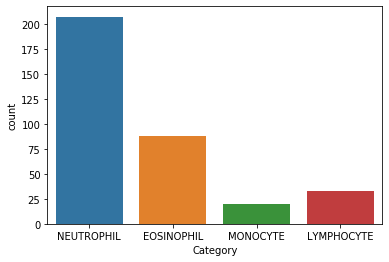

In [13]:
# number of images in each categories
sns.countplot(x = labels_orig["Category"]);

In [14]:
labels_orig.reset_index(inplace=True,drop=True)
labels_orig.head(10)

Image    Category
0      0  NEUTROPHIL
1      1  NEUTROPHIL
2      2  NEUTROPHIL
3      3  NEUTROPHIL
4      4  NEUTROPHIL
5      5  NEUTROPHIL
6      6  NEUTROPHIL
7      7  NEUTROPHIL
8      9  EOSINOPHIL
9     11  NEUTROPHIL

In [15]:
# number of images for Granulocyte vs Mononuclear (Agranulocyte)
# generate new column in the labels_orig dataframe with 1, if the cell is a Granulocyte and 0 else
for i in range(labels_orig.shape[0]):
    if ((labels_orig.loc[i,"Category"] == "EOSINOPHIL")  or (labels_orig.loc[i,'Category'] == "NEUTROPHIL")):
        labels_orig.loc[i,"Granulocyte"] = 1
    else:
        labels_orig.loc[i,"Granulocyte"] = 0
labels_orig.head(20)

Image    Category  Granulocyte
0       0  NEUTROPHIL          1.0
1       1  NEUTROPHIL          1.0
2       2  NEUTROPHIL          1.0
3       3  NEUTROPHIL          1.0
4       4  NEUTROPHIL          1.0
5       5  NEUTROPHIL          1.0
6       6  NEUTROPHIL          1.0
7       7  NEUTROPHIL          1.0
8       9  EOSINOPHIL          1.0
9      11  NEUTROPHIL          1.0
10     12  NEUTROPHIL          1.0
11     13  NEUTROPHIL          1.0
12     14  NEUTROPHIL          1.0
13     15    MONOCYTE          0.0
14     16  NEUTROPHIL          1.0
15     17  EOSINOPHIL          1.0
16     18  NEUTROPHIL          1.0
17     19  NEUTROPHIL          1.0
18     20  LYMPHOCYTE          0.0
19     21  LYMPHOCYTE          0.0

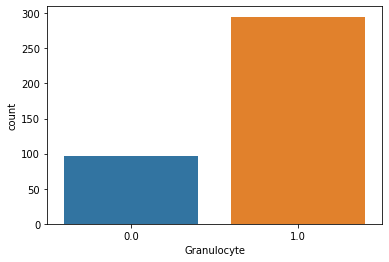

In [16]:
# number of images in each categories
sns.countplot(x = labels_orig["Granulocyte"]);

In [17]:
# number of images for Lymphocytes vs rest
# generate new column in the labels_orig dataframe with 1, if the cell is a lymphocyte and 0 else
for i in range(labels_orig.shape[0]):
    if ((labels_orig.loc[i,"Category"] == "LYMPHOCYTE")):
        labels_orig.loc[i,"Lymphocyte"] = 1
    else:
        labels_orig.loc[i,"Lymphocyte"] = 0
labels_orig.head(20)

Image    Category  Granulocyte  Lymphocyte
0       0  NEUTROPHIL          1.0         0.0
1       1  NEUTROPHIL          1.0         0.0
2       2  NEUTROPHIL          1.0         0.0
3       3  NEUTROPHIL          1.0         0.0
4       4  NEUTROPHIL          1.0         0.0
5       5  NEUTROPHIL          1.0         0.0
6       6  NEUTROPHIL          1.0         0.0
7       7  NEUTROPHIL          1.0         0.0
8       9  EOSINOPHIL          1.0         0.0
9      11  NEUTROPHIL          1.0         0.0
10     12  NEUTROPHIL          1.0         0.0
11     13  NEUTROPHIL          1.0         0.0
12     14  NEUTROPHIL          1.0         0.0
13     15    MONOCYTE          0.0         0.0
14     16  NEUTROPHIL          1.0         0.0
15     17  EOSINOPHIL          1.0         0.0
16     18  NEUTROPHIL          1.0         0.0
17     19  NEUTROPHIL          1.0         0.0
18     20  LYMPHOCYTE          0.0         1.0
19     21  LYMPHOCYTE          0.0         1.0

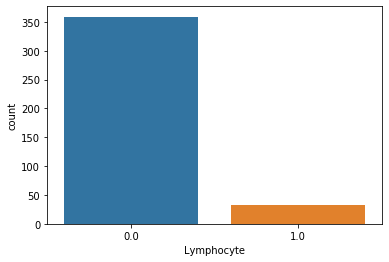

In [18]:
# number of images in each categories
sns.countplot(x = labels_orig["Lymphocyte"]);

In [19]:
# format the ids to numbers of 5 digits, because this is how they appear in the name of the image
id_eosinophil5 = ['{:05d}'.format(i) for i in id_eosinophil]
id_neutrophil5 = ['{:05d}'.format(i) for i in id_neutrophil]
id_lymphocyte5 = ['{:05d}'.format(i) for i in id_lymphocyte]
id_monocyte5   = ['{:05d}'.format(i) for i in id_monocyte]

Image shape: (480, 640, 3)


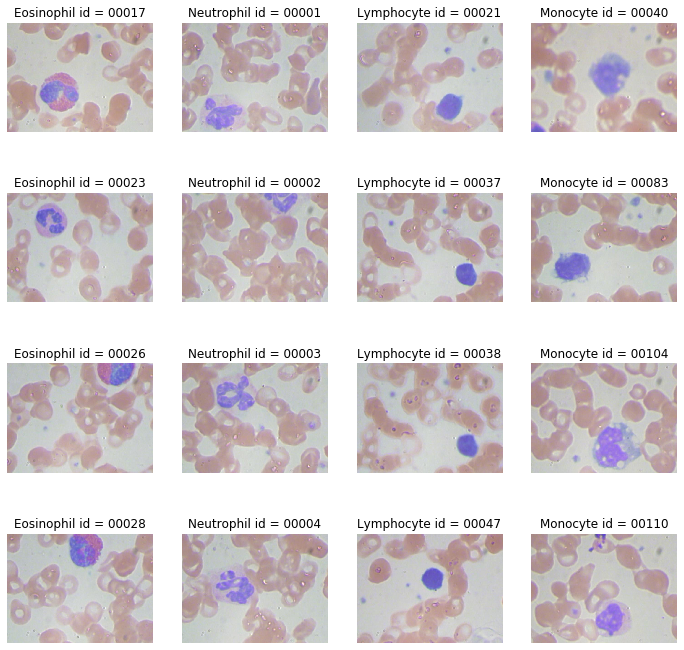

In [20]:
# plot some images for each category (1 category per column)a
fig, axes = plt.subplots(ncols=4, nrows=4, figsize=(12, 12))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
n = 16
m1 = m2 = m3 = m4 = 0

for i in range(n):
    if i%4 == 0: # first category
        m1 += 1
        current_id = id_eosinophil5[m1]
        img = io.imread(path_orig_images + "BloodImage_" + current_id + '.jpg')
        axes[m1-1,0].imshow(img, cmap=plt.cm.gray)
        axes[m1-1,0].set_title("Eosinophil id = " + current_id)
        axes[m1-1,0].axis('off')
    if i%4 == 1: # second category
        m2 += 1
        current_id = id_neutrophil5[m2]
        img = io.imread(path_orig_images + "BloodImage_" + current_id + '.jpg')
        axes[m2-1,1].imshow(img, cmap=plt.cm.gray)
        axes[m2-1,1].set_title("Neutrophil id = " + current_id)
        axes[m2-1,1].axis('off')
    if i%4 == 2: # third category
        m3 += 1
        current_id = id_lymphocyte5[m3]
        img = io.imread(path_orig_images + "BloodImage_" + current_id + '.jpg')
        axes[m3-1,2].imshow(img, cmap=plt.cm.gray)
        axes[m3-1,2].set_title("Lymphocyte id = " + current_id)
        axes[m3-1,2].axis('off')
    if i%4 == 3: # fourth category
        m4 += 1
        current_id = id_monocyte5[m4]
        img = io.imread(path_orig_images + "BloodImage_" + current_id + '.jpg')
        axes[m4-1,3].imshow(img, cmap=plt.cm.gray)
        axes[m4-1,3].set_title("Monocyte id = " + current_id)
        axes[m4-1,3].axis('off')
   
print("Image shape: " + str(img.shape))



**What is characteristic for each category**
* Eosophil: mainly bilobed nucleus
* Neutrophil: bar-shaped nucleus (young form) and  multilobulated nucleus (adult form)
* Lyphocyte: large nucleus
* Monocyte: mononuclear (nucleus is ellipsoidal; metaphorically bean-shaped or kidney-shaped) 

In [21]:
# Display image and histogram of the color channels red, green and blue
def plot_histogram(img,x,y,title,ysize):
    #axes[x,y].imshow(img, cmap=plt.cm.gray)
    axes[x,y].imshow(img)
    axes[x,y].set_title(title)
    axes[x,y].axis('off')
    n_bins = 30
    axes[x,y+1].hist(img[:,:,0].flatten(), bins= n_bins, lw = 0, color='r', alpha=0.5);
    axes[x,y+1].hist(img[:,:,1].flatten(), bins= n_bins, lw = 0, color='g', alpha=0.5);
    axes[x,y+1].hist(img[:,:,2].flatten(), bins= n_bins, lw = 0, color='b', alpha=0.5);
    axes[x,y+1].set_ylim(0,ysize)
    axes[x,y+1].set_ylabel('Count')
    axes[x,y+1].set_xlabel('Pixel Intensity')

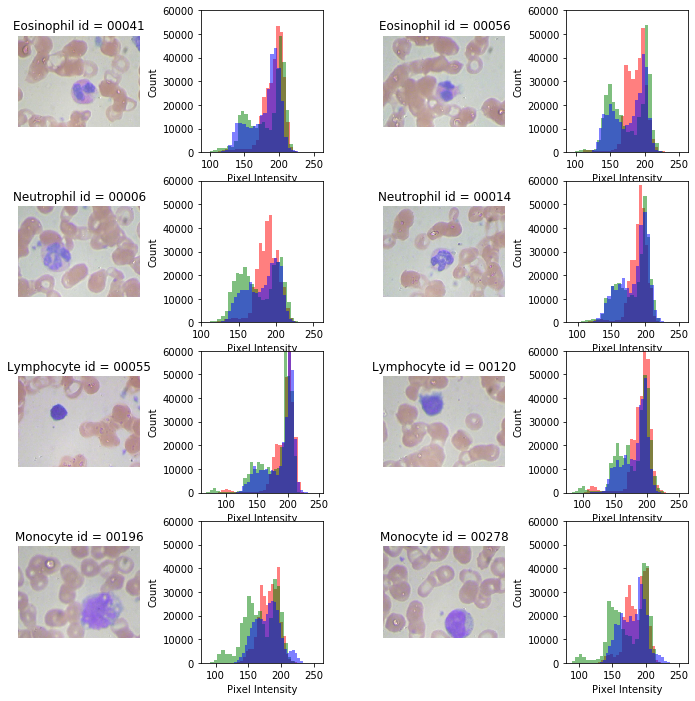

In [22]:
# plot some examples and their color histograms
fig, axes = plt.subplots(ncols=4, nrows=4, figsize=(12, 12))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=None)

m1 = m2 = m3 = m4 = 6
# first category 
current_id = id_eosinophil5[m1]
img = io.imread(path_orig_images + "BloodImage_" + current_id + '.jpg')
title = "Eosinophil id = " + current_id
plot_histogram(img,0,0, title, 60000)
current_id = id_eosinophil5[m1+5]
img = io.imread(path_orig_images + "BloodImage_" + current_id + '.jpg')
title = "Eosinophil id = " + current_id
plot_histogram(img,0,2, title, 60000)
# second category
current_id = id_neutrophil5[m2]
img = io.imread(path_orig_images + "BloodImage_" + current_id + '.jpg')
title = "Neutrophil id = " + current_id
plot_histogram(img,1,0,title, 60000)
current_id = id_neutrophil5[m2+5]
img = io.imread(path_orig_images + "BloodImage_" + current_id + '.jpg')
title = "Neutrophil id = " + current_id
plot_histogram(img,1,2,title, 60000)
# third category
current_id = id_lymphocyte5[m3]
img = io.imread(path_orig_images + "BloodImage_" + current_id + '.jpg')
title = "Lymphocyte id = " + current_id
plot_histogram(img,2,0,title, 60000)
current_id = id_lymphocyte5[m3+5]
img = io.imread(path_orig_images + "BloodImage_" + current_id + '.jpg')
title = "Lymphocyte id = " + current_id
plot_histogram(img,2,2,title, 60000)
# fourth category
current_id = id_monocyte5[m4]
img = io.imread(path_orig_images + "BloodImage_" + current_id + '.jpg')
title = "Monocyte id = " + current_id
plot_histogram(img,3,0,title, 60000)
current_id = id_monocyte5[m4+5]
img = io.imread(path_orig_images + "BloodImage_" + current_id + '.jpg')
title = "Monocyte id = " + current_id
plot_histogram(img,3,2,title, 60000)

Image shape: (480, 640, 3)
Grayscale image shape: (480, 640)


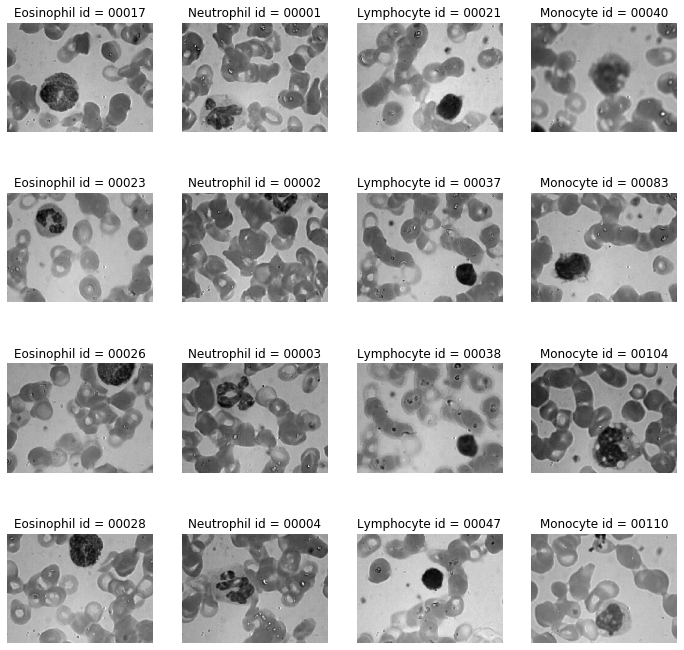

In [23]:
# plot some images as grayscale -> Do we still have enough information?
fig, axes = plt.subplots(ncols=4, nrows=4, figsize=(12, 12))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
n = 16
m1 = m2 = m3 = m4 = 0

for i in range(n):
    if i%4 == 0: # first category
        m1 += 1
        current_id = id_eosinophil5[m1]
        img = io.imread(path_orig_images + "BloodImage_" + current_id + '.jpg')
        grayscale = rgb2gray(img)
        axes[m1-1,0].imshow(grayscale, cmap=plt.cm.gray)
        axes[m1-1,0].set_title("Eosinophil id = " + current_id)
        axes[m1-1,0].axis('off')
    if i%4 == 1: # second category
        m2 += 1
        current_id = id_neutrophil5[m2]
        img = io.imread(path_orig_images + "BloodImage_" + current_id + '.jpg')
        grayscale = rgb2gray(img)
        axes[m2-1,1].imshow(grayscale, cmap=plt.cm.gray)
        axes[m2-1,1].set_title("Neutrophil id = " + current_id)
        axes[m2-1,1].axis('off')
    if i%4 == 2: # third category
        m3 += 1
        current_id = id_lymphocyte5[m3]
        img = io.imread(path_orig_images + "BloodImage_" + current_id + '.jpg')
        grayscale = rgb2gray(img)
        axes[m3-1,2].imshow(grayscale, cmap=plt.cm.gray)
        axes[m3-1,2].set_title("Lymphocyte id = " + current_id)
        axes[m3-1,2].axis('off')
    if i%4 == 3: # fourth category
        m4 += 1
        current_id = id_monocyte5[m4]
        img = io.imread(path_orig_images + "BloodImage_" + current_id + '.jpg')
        grayscale = rgb2gray(img)
        axes[m4-1,3].imshow(grayscale, cmap=plt.cm.gray)
        axes[m4-1,3].set_title("Monocyte id = " + current_id)
        axes[m4-1,3].axis('off')
   
print("Image shape: " + str(img.shape))
print("Grayscale image shape: " + str(grayscale.shape))

## Augmented Images

The data has already been augmented, we have a **training dataset of 9957 images**, with almost **equal size for each class** (Eosinophil: 2497 images, Neutrophil: 2499 images, Lymphocyte: 2483 images, Monocyte: 2478 images). The augmented images have a size of (240, 320, 3). Their color histogram show black pixels due to the background. The number of pixels for each color is less due to the reduction of the dimension. The maximum pixel count is still at about 200 for all colors. Some grayscale images are shown, the results still seem to represent the cell types, however thea are more difficult to distinguish (See previous section). 

In [24]:
# read image ids for each class and safe them in a list
def read_id(input_path):
    id_image = []
    for path in iglob(input_path + '*.jpeg'):
        path_split= path.split("/")
        name = path_split[-1].split('.')[0]
        name2 = name.split('_')
        name3 = "_"+name2[1]+"_"+name2[2]
        id_image.append(name3)
    return id_image

input_path = path_train_augm[0]
id_eosinophil_aug = read_id(input_path)
input_path = path_train_augm[1]
id_neutrophil_aug = read_id(input_path)
input_path = path_train_augm[2]
id_lymphocyte_aug = read_id(input_path)
input_path = path_train_augm[3]
id_monocyte_aug = read_id(input_path)

Image shape: (240, 320, 3)


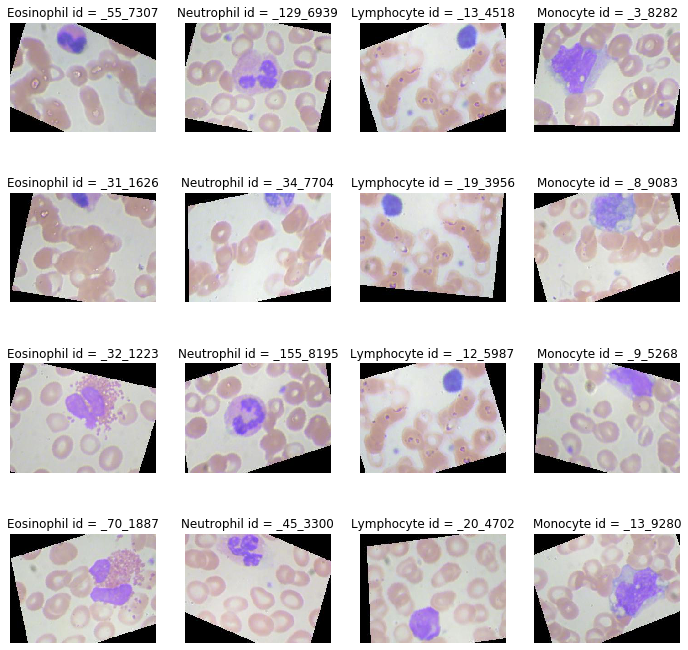

In [25]:
# plot some of the augmented images
def plot_aug(path):
    fig, axes = plt.subplots(ncols=4, nrows=4, figsize=(12, 12))
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
    n = 16
    m1 = m2 = m3 = m4 = 0
    id_select = []
    for i in range(n):
        if i%4 == 0: # first category
            m1 += 1
            current_id = id_eosinophil_aug[m1]
            img = io.imread(path[0] + current_id + '.jpeg')
            axes[m1-1,0].imshow(img, cmap=plt.cm.gray)
            axes[m1-1,0].set_title("Eosinophil id = " + current_id)
            axes[m1-1,0].axis('off')
        if i%4 == 1: # second category
            m2 += 1
            current_id = id_neutrophil_aug[m2]
            img = io.imread(path[1] + current_id + '.jpeg')
            axes[m2-1,1].imshow(img, cmap=plt.cm.gray)
            axes[m2-1,1].set_title("Neutrophil id = " + current_id)
            axes[m2-1,1].axis('off')
        if i%4 == 2: # third category
            m3 += 1
            current_id = id_lymphocyte_aug[m3]
            img = io.imread(path[2] + current_id + '.jpeg')
            axes[m3-1,2].imshow(img, cmap=plt.cm.gray)
            axes[m3-1,2].set_title("Lymphocyte id = " + current_id)
            axes[m3-1,2].axis('off')
        if i%4 == 3: # fourth category
            m4 += 1
            current_id = id_monocyte_aug[m4]
            img = io.imread(path[3] + current_id + '.jpeg')
            axes[m4-1,3].imshow(img, cmap=plt.cm.gray)
            axes[m4-1,3].set_title("Monocyte id = " + current_id)
            axes[m4-1,3].axis('off')
   
    print("Image shape: " + str(img.shape))
    
plot_aug(path_train_augm)

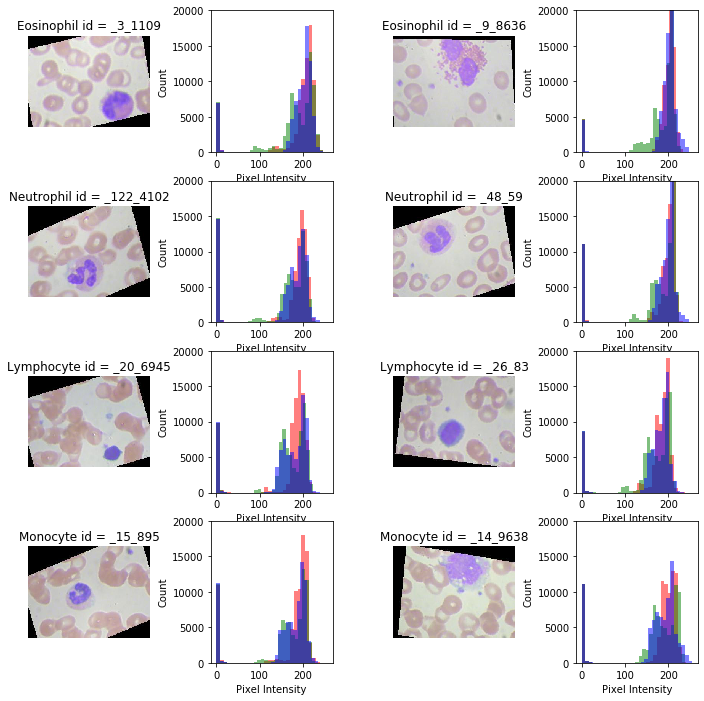

In [26]:
# plot some examples and their color histograms

fig, axes = plt.subplots(ncols=4, nrows=4, figsize=(12, 12))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=None)

m1 = m2 = m3 = m4 = 6
# first category 
current_id = id_eosinophil_aug[m1]
img = io.imread(path_train_augm[0] + str(current_id) + '.jpeg')
title = "Eosinophil id = " + current_id
plot_histogram(img,0,0, title, 20000)
current_id = id_eosinophil_aug[m1+5]
img = io.imread(path_train_augm[0] + str(current_id) + '.jpeg')
title = "Eosinophil id = " + current_id
plot_histogram(img,0,2, title, 20000)
# second category
current_id = id_neutrophil_aug[m2]
img = io.imread(path_train_augm[1] + str(current_id) + '.jpeg')
title = "Neutrophil id = " + current_id
plot_histogram(img,1,0,title, 20000)
current_id = id_neutrophil_aug[m2+5]
img = io.imread(path_train_augm[1] + str(current_id) + '.jpeg')
title = "Neutrophil id = " + current_id
plot_histogram(img,1,2,title, 20000)
# third category
current_id = id_lymphocyte_aug[m3]
img = io.imread(path_train_augm[2] + str(current_id) + '.jpeg')
title = "Lymphocyte id = " + current_id
plot_histogram(img,2,0,title, 20000)
current_id = id_lymphocyte_aug[m3+5]
img = io.imread(path_train_augm[2] + str(current_id) + '.jpeg')
title = "Lymphocyte id = " + current_id
plot_histogram(img,2,2,title, 20000)
# fourth category
current_id = id_monocyte_aug[m4]
img = io.imread(path_train_augm[3] + str(current_id) + '.jpeg')
title = "Monocyte id = " + current_id
plot_histogram(img,3,0,title, 20000)
current_id = id_monocyte_aug[m4+5]
img = io.imread(path_train_augm[3] + str(current_id) + '.jpeg')
title = "Monocyte id = " + current_id
plot_histogram(img,3,2,title, 20000)
    


Image shape: (240, 320, 3)
Grayscale image shape: (240, 320)


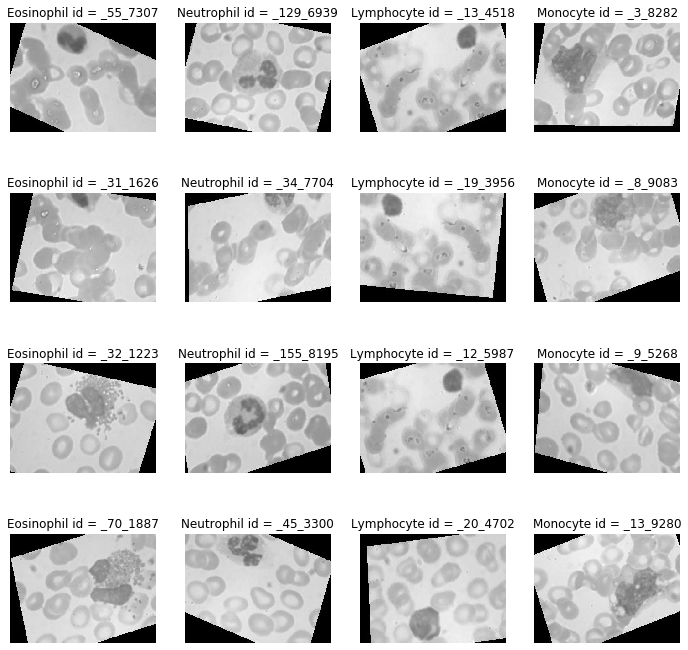

In [27]:
# plot some augmented samples in grayscale -> do we still have enough information?
def plot_aug_bw(path):
    fig, axes = plt.subplots(ncols=4, nrows=4, figsize=(12, 12))
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
    n = 16
    m1 = m2 = m3 = m4 = 0
    id_select = []
    for i in range(n):
        if i%4 == 0: # first category
            m1 += 1
            current_id = id_eosinophil_aug[m1]
            #img = io.imread(path_train_augm[0] + "_" + current_id + '.jpeg')
            img = io.imread(path[0] + current_id + '.jpeg')
            grayscale = rgb2gray(img)
            axes[m1-1,0].imshow(grayscale, cmap=plt.cm.gray)
            axes[m1-1,0].set_title("Eosinophil id = " + current_id)
            axes[m1-1,0].axis('off')
        if i%4 == 1: # second category
            m2 += 1
            current_id = id_neutrophil_aug[m2]
            #img = io.imread(path_train_augm[1] + "_" + current_id + '.jpeg')
            img = io.imread(path[1] + current_id + '.jpeg')
            grayscale = rgb2gray(img)
            axes[m2-1,1].imshow(grayscale, cmap=plt.cm.gray)
            axes[m2-1,1].set_title("Neutrophil id = " + current_id)
            axes[m2-1,1].axis('off')
        if i%4 == 2: # third category
            m3 += 1
            current_id = id_lymphocyte_aug[m3]
            #img = io.imread(path_train_augm[2] + "_" + current_id + '.jpeg')
            img = io.imread(path[2] + current_id + '.jpeg')
            grayscale = rgb2gray(img)
            axes[m3-1,2].imshow(grayscale, cmap=plt.cm.gray)
            axes[m3-1,2].set_title("Lymphocyte id = " + current_id)
            axes[m3-1,2].axis('off')
        if i%4 == 3: # fourth category
            m4 += 1
            current_id = id_monocyte_aug[m4]
            #img = io.imread(path_train_augm[3] + "_" + current_id + '.jpeg')
            img = io.imread(path[3] + current_id + '.jpeg')
            grayscale = rgb2gray(img)
            axes[m4-1,3].imshow(grayscale, cmap=plt.cm.gray)
            axes[m4-1,3].set_title("Monocyte id = " + current_id)
            axes[m4-1,3].axis('off')
   
    print("Image shape: " + str(img.shape))
    print("Grayscale image shape: " + str(grayscale.shape))

plot_aug_bw(path_train_augm)

# Feature Engineering

## Image Preprocessing

We will reduce the size due to saving computational sources and shrink the images to a fourth of their size to (60, 80, 3). The pixels are scaled by deviding through 255, so that all values are between 0 and 1. The images are then flattened and saved as a dataframe.

* Define a new column "class" for the four categories of cells: 

    * Eosinophil: class = 1 
    * Neutrophil: class = 2 
    * Lymphocyte: class = 3
    * Monocyte: class = 4 

* Define further for new columns, one for each category of the cells: classE, classN, classL and classM. The entry is 1 if the celltype is of the category and 0 else. This is done to consider binary classification problems.

* Define a new column for Granulocytes vs. Mononuclear. The entry is 1 if the celltype is of the category Granulocyte and 0 else. 

Additionally we will color the black margin, which resulted from the augmentation, to a more similar color. As we attempt to find patterns with principal component analysis the margins might influence the results. 


## Save original augmented Images as Dataframe

In [28]:
def save_as_df(image_path):
    i=0
    cells = pd.DataFrame([])
    for path in iglob(image_path):
        img=io.imread(path) 
        img = img_as_ubyte(img)
        #img = resize(img, (120, 160, 3))
        img = resize(img, (60, 80, 3))
        # scale images
        #img=img/255.0
        cell = pd.Series(img.flatten(),name=path)
        cells = cells.append(cell)
    return cells

In [29]:
# resize, scale, flatten images and safe as dataframe
# add six additional columns: 
# class number between 1 and 4 (1:,2:,3:,4:)
# classE
# classN
# classL
# classM
# Granulocyte

# first class: eosinophil
image_path = path_train_augm[0] + '*.jpeg'
cells1 = save_as_df(image_path)
cells1["id"] = id_eosinophil_aug
cells1["class"] = 1
cells1["classE"] = 1
cells1["classN"] = 0
cells1["classL"] = 0
cells1["classM"] = 0
cells1["granulocyte"] = 1

In [30]:
cells1.head()

0    1    2    3    4  \
dataset2-master/dataset2-master/images/TRAIN/tr...  0.0  0.0  0.0  0.0  0.0   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.0  0.0  0.0  0.0  0.0   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.0  0.0  0.0  0.0  0.0   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.0  0.0  0.0  0.0  0.0   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.0  0.0  0.0  0.0  0.0   

                                                      5    6    7    8    9  \
dataset2-master/dataset2-master/images/TRAIN/tr...  0.0  0.0  0.0  0.0  0.0   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.0  0.0  0.0  0.0  0.0   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.0  0.0  0.0  0.0  0.0   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.0  0.0  0.0  0.0  0.0   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.0  0.0  0.0  0.0  0.0   

                                                    ...     14397     14398  \
dataset2-master/dataset2-master/images/TRAIN/tr...  ...  0.018627  0.016667   
dataset2-master/dataset2-master/images/TRAIN/tr...  ...  0.741176  0.756863   
dataset2-master/dataset2-master/images/TRAIN/tr...  ...  0.774510  0.728431   
dataset2-master/dataset2-master/images/TRAIN/tr...  ...  0.000000  0.000000   
dataset2-master/dataset2-master/images/TRAIN/tr...  ...  0.000000  0.000000   

                                                       14399        id  class  \
dataset2-master/dataset2-master/images/TRAIN/tr...  0.026471  _18_9690      1   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.764706  _55_7307      1   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.727451  _31_1626      1   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.000000  _32_1223      1   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.000000  _70_1887      1   

                                                    classE  classN  classL  \
dataset2-master/dataset2-master/images/TRAIN/tr...       1       0       0   
dataset2-master/dataset2-master/images/TRAIN/tr...       1       0       0   
dataset2-master/dataset2-master/images/TRAIN/tr...       1       0       0   
dataset2-master/dataset2-master/images/TRAIN/tr...       1       0       0   
dataset2-master/dataset2-master/images/TRAIN/tr...       1       0       0   

                                                    classM  granulocyte  
dataset2-master/dataset2-master/images/TRAIN/tr...       0            1  
dataset2-master/dataset2-master/images/TRAIN/tr...       0            1  
dataset2-master/dataset2-master/images/TRAIN/tr...       0            1  
dataset2-master/dataset2-master/images/TRAIN/tr...       0            1  
dataset2-master/dataset2-master/images/TRAIN/tr...       0            1  

[5 rows x 14407 columns]

In [31]:
# second class: neutrophil
image_path = path_train_augm[1] + '*.jpeg'
cells2 = save_as_df(image_path)
cells2["id"] = id_neutrophil_aug
cells2["class"] = 2
cells2["classE"] = 0
cells2["classN"] = 1
cells2["classL"] = 0
cells2["classM"] = 0
cells2["granulocyte"] = 1

In [32]:
cells2.head()

0         1  \
dataset2-master/dataset2-master/images/TRAIN/tr...  0.111765  0.100000   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.000000  0.000000   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.000000  0.000000   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.000000  0.000000   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.747059  0.615686   

                                                           2         3  \
dataset2-master/dataset2-master/images/TRAIN/tr...  0.101961  0.713725   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.000000  0.000000   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.000000  0.000000   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.000000  0.000000   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.635294  0.733333   

                                                           4         5  \
dataset2-master/dataset2-master/images/TRAIN/tr...  0.694118  0.700980   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.000000  0.000000   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.000000  0.000000   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.000000  0.000000   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.625490  0.707843   

                                                           6         7  \
dataset2-master/dataset2-master/images/TRAIN/tr...  0.801961  0.769608   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.000000  0.000000   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.000000  0.000000   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.000000  0.000000   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.785294  0.724510   

                                                           8         9  ...  \
dataset2-master/dataset2-master/images/TRAIN/tr...  0.780392  0.803922  ...   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.000000  0.000000  ...   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.000000  0.000000  ...   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.000000  0.000000  ...   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.802941  0.792157  ...   

                                                    14397  14398  14399  \
dataset2-master/dataset2-master/images/TRAIN/tr...    0.0    0.0    0.0   
dataset2-master/dataset2-master/images/TRAIN/tr...    0.0    0.0    0.0   
dataset2-master/dataset2-master/images/TRAIN/tr...    0.0    0.0    0.0   
dataset2-master/dataset2-master/images/TRAIN/tr...    0.0    0.0    0.0   
dataset2-master/dataset2-master/images/TRAIN/tr...    0.0    0.0    0.0   

                                                           id  class  classE  \
dataset2-master/dataset2-master/images/TRAIN/tr...  _142_4726      2       0   
dataset2-master/dataset2-master/images/TRAIN/tr...  _129_6939      2       0   
dataset2-master/dataset2-master/images/TRAIN/tr...   _34_7704      2       0   
dataset2-master/dataset2-master/images/TRAIN/tr...  _155_8195      2       0   
dataset2-master/dataset2-master/images/TRAIN/tr...   _45_3300      2       0   

                                                    classN  classL  classM  \
dataset2-master/dataset2-master/images/TRAIN/tr...       1       0       0   
dataset2-master/dataset2-master/images/TRAIN/tr...       1       0       0   
dataset2-master/dataset2-master/images/TRAIN/tr...       1       0       0   
dataset2-master/dataset2-master/images/TRAIN/tr...       1       0       0   
dataset2-master/dataset2-master/images/TRAIN/tr...       1       0       0   

                                                    granulocyte  
dataset2-master/dataset2-master/images/TRAIN/tr...            1  
dataset2-master/dataset2-master/images/TRAIN/tr...            1  
dataset2-master/dataset2-master/images/TRAIN/tr...            1  
dataset2-master/dataset2-master/images/TRAIN/tr...            1  
dataset2-master/dataset2-master/images/TRAIN/tr...            1  

[5 row

In [33]:
# third class: lymphocyte
image_path = path_train_augm[2] + '*.jpeg'
cells3 = save_as_df(image_path)
cells3["id"] = id_lymphocyte_aug
cells3["class"] = 3
cells3["classE"] = 0
cells3["classN"] = 0
cells3["classL"] = 1
cells3["classM"] = 0
cells3["granulocyte"] = 0

In [34]:
cells3.head()

0         1  \
dataset2-master/dataset2-master/images/TRAIN/tr...  0.578431  0.472549   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.000000  0.000000   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.772549  0.622549   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.000000  0.000000   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.000000  0.000000   

                                                           2         3  \
dataset2-master/dataset2-master/images/TRAIN/tr...  0.460784  0.718627   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.000000  0.000000   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.623529  0.754902   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.000000  0.000000   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.000000  0.000000   

                                                           4         5  \
dataset2-master/dataset2-master/images/TRAIN/tr...  0.531373  0.536275   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.000000  0.000000   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.602941  0.615686   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.000000  0.000000   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.000000  0.000000   

                                                           6         7  \
dataset2-master/dataset2-master/images/TRAIN/tr...  0.699020  0.535294   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.000000  0.000000   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.767647  0.616667   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.000000  0.000000   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.000000  0.000000   

                                                           8         9  ...  \
dataset2-master/dataset2-master/images/TRAIN/tr...  0.521569  0.705882  ...   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.000000  0.000000  ...   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.615686  0.814706  ...   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.000000  0.000000  ...   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.000000  0.000000  ...   

                                                       14397     14398  \
dataset2-master/dataset2-master/images/TRAIN/tr...  0.773529  0.697059   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.000000  0.000000   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.000000  0.000000   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.000000  0.000000   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.000000  0.001961   

                                                       14399        id  class  \
dataset2-master/dataset2-master/images/TRAIN/tr...  0.682353   _6_1405      3   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.000000  _13_4518      3   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.000000  _19_3956      3   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.000000  _12_5987      3   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.000000  _20_4702      3   

                                                    classE  classN  classL  \
dataset2-master/dataset2-master/images/TRAIN/tr...       0       0       1   
dataset2-master/dataset2-master/images/TRAIN/tr...       0       0       1   
dataset2-master/dataset2-master/images/TRAIN/tr...       0       0       1   
dataset2-master/dataset2-master/images/TRAIN/tr...       0       0       1   
dataset2-master/dataset2-master/images/TRAIN/tr...       0       0       1   

                                                    classM  granulocyte  
dataset2-master/dataset2-master/images/TRAIN/tr...       0            0  
dataset2-master/dataset2-master/images/TRAIN/tr...       0            0  
dataset2-master/dataset2-master/images/TRAIN/tr...       0            0  
dataset2-master/dataset2-master/images/TRAIN/tr...       0            0  
dataset2-master/dataset2-master/i

In [35]:
# fourth class: monocyte
image_path = path_train_augm[3] + '*.jpeg'
cells4 = save_as_df(image_path)
cells4["id"] = id_monocyte_aug
cells4["class"] = 4
cells4["classE"] = 0
cells4["classN"] = 0
cells4["classL"] = 0
cells4["classM"] = 1
cells4["granulocyte"] = 0

In [36]:
cells4.head()

0    1    2    3    4  \
dataset2-master/dataset2-master/images/TRAIN/tr...  0.0  0.0  0.0  0.0  0.0   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.0  0.0  0.0  0.0  0.0   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.0  0.0  0.0  0.0  0.0   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.0  0.0  0.0  0.0  0.0   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.0  0.0  0.0  0.0  0.0   

                                                      5    6    7    8    9  \
dataset2-master/dataset2-master/images/TRAIN/tr...  0.0  0.0  0.0  0.0  0.0   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.0  0.0  0.0  0.0  0.0   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.0  0.0  0.0  0.0  0.0   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.0  0.0  0.0  0.0  0.0   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.0  0.0  0.0  0.0  0.0   

                                                    ...     14397     14398  \
dataset2-master/dataset2-master/images/TRAIN/tr...  ...  0.000000  0.000000   
dataset2-master/dataset2-master/images/TRAIN/tr...  ...  0.000000  0.000000   
dataset2-master/dataset2-master/images/TRAIN/tr...  ...  0.000000  0.000000   
dataset2-master/dataset2-master/images/TRAIN/tr...  ...  0.702941  0.638235   
dataset2-master/dataset2-master/images/TRAIN/tr...  ...  0.000000  0.000000   

                                                       14399        id  class  \
dataset2-master/dataset2-master/images/TRAIN/tr...  0.000000    _4_825      4   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.000000   _3_8282      4   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.000000   _8_9083      4   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.637255   _9_5268      4   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.000000  _13_9280      4   

                                                    classE  classN  classL  \
dataset2-master/dataset2-master/images/TRAIN/tr...       0       0       0   
dataset2-master/dataset2-master/images/TRAIN/tr...       0       0       0   
dataset2-master/dataset2-master/images/TRAIN/tr...       0       0       0   
dataset2-master/dataset2-master/images/TRAIN/tr...       0       0       0   
dataset2-master/dataset2-master/images/TRAIN/tr...       0       0       0   

                                                    classM  granulocyte  
dataset2-master/dataset2-master/images/TRAIN/tr...       1            0  
dataset2-master/dataset2-master/images/TRAIN/tr...       1            0  
dataset2-master/dataset2-master/images/TRAIN/tr...       1            0  
dataset2-master/dataset2-master/images/TRAIN/tr...       1            0  
dataset2-master/dataset2-master/images/TRAIN/tr...       1            0  

[5 rows x 14407 columns]

In [37]:
# save all in 1 dataframe and delete the others
blood_aug = cells1.copy()
blood_aug = blood_aug.append(cells2)
del cells1
blood_aug = blood_aug.append(cells3)
del cells2
blood_aug = blood_aug.append(cells4)
del cells3
del cells4
blood_aug.head()

0    1    2    3    4  \
dataset2-master/dataset2-master/images/TRAIN/tr...  0.0  0.0  0.0  0.0  0.0   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.0  0.0  0.0  0.0  0.0   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.0  0.0  0.0  0.0  0.0   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.0  0.0  0.0  0.0  0.0   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.0  0.0  0.0  0.0  0.0   

                                                      5    6    7    8    9  \
dataset2-master/dataset2-master/images/TRAIN/tr...  0.0  0.0  0.0  0.0  0.0   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.0  0.0  0.0  0.0  0.0   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.0  0.0  0.0  0.0  0.0   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.0  0.0  0.0  0.0  0.0   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.0  0.0  0.0  0.0  0.0   

                                                    ...     14397     14398  \
dataset2-master/dataset2-master/images/TRAIN/tr...  ...  0.018627  0.016667   
dataset2-master/dataset2-master/images/TRAIN/tr...  ...  0.741176  0.756863   
dataset2-master/dataset2-master/images/TRAIN/tr...  ...  0.774510  0.728431   
dataset2-master/dataset2-master/images/TRAIN/tr...  ...  0.000000  0.000000   
dataset2-master/dataset2-master/images/TRAIN/tr...  ...  0.000000  0.000000   

                                                       14399        id  class  \
dataset2-master/dataset2-master/images/TRAIN/tr...  0.026471  _18_9690      1   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.764706  _55_7307      1   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.727451  _31_1626      1   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.000000  _32_1223      1   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.000000  _70_1887      1   

                                                    classE  classN  classL  \
dataset2-master/dataset2-master/images/TRAIN/tr...       1       0       0   
dataset2-master/dataset2-master/images/TRAIN/tr...       1       0       0   
dataset2-master/dataset2-master/images/TRAIN/tr...       1       0       0   
dataset2-master/dataset2-master/images/TRAIN/tr...       1       0       0   
dataset2-master/dataset2-master/images/TRAIN/tr...       1       0       0   

                                                    classM  granulocyte  
dataset2-master/dataset2-master/images/TRAIN/tr...       0            1  
dataset2-master/dataset2-master/images/TRAIN/tr...       0            1  
dataset2-master/dataset2-master/images/TRAIN/tr...       0            1  
dataset2-master/dataset2-master/images/TRAIN/tr...       0            1  
dataset2-master/dataset2-master/images/TRAIN/tr...       0            1  

[5 rows x 14407 columns]

## Change Background Color

We change the pixels below and above a certain threshold to the background-color. This helps us to get rid of the black margin.

In [38]:
# change black margins
# change all pixel below a threshold of 90 to a color, that is similar to the background color

def change_bg(input_path):
    threshold = 90
    for path in iglob(input_path + '*.jpeg'):
        img = io.imread(path)
        gray = np.sum(img, axis=2).astype(int)
        img[gray < threshold] = 225
        name = path.split("/")
        #print(name[-1])
        img = img_as_ubyte(img)
        io.imsave(output_path + name[-1],img)

In [39]:
input_path = path_train_augm[0]
output_path = path_train_augm_c[0]
change_bg(input_path)

In [40]:
input_path = path_train_augm[1]
output_path = path_train_augm_c[1]
change_bg(input_path)

In [41]:
input_path = path_train_augm[2]
output_path = path_train_augm_c[2]
change_bg(input_path)

In [42]:
input_path = path_train_augm[3]
output_path = path_train_augm_c[3]
change_bg(input_path)

## Save Images as Dataframe

In [43]:
# resize, scale, flatten images and safe as dataframe
# add six additional columns: 
# class number between 1 and 4 (1:,2:,3:,4:)
# classE
# classN
# classL
# classM
# Granulocyte

# first class: eosinophil
image_path = path_train_augm_c[0] + '*.jpeg'
cells1 = save_as_df(image_path)
cells1["id"] = id_eosinophil_aug
cells1["class"] = 1
cells1["classE"] = 1
cells1["classN"] = 0
cells1["classL"] = 0
cells1["classM"] = 0
cells1["granulocyte"] = 1

In [44]:
cells1.head()

0         1  \
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   

                                                           2         3  \
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   

                                                           4         5  \
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   

                                                           6         7  \
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   

                                                           8         9  ...  \
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353  ...   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353  ...   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353  ...   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353  ...   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353  ...   

                                                       14397     14398  \
dataset2-master/dataset2-master/images/TRAIN/tr...  0.861765  0.881373   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.741176  0.756863   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.774510  0.728431   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   

                                                       14399        id  class  \
dataset2-master/dataset2-master/images/TRAIN/tr...  0.883333  _18_9690      1   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.764706  _55_7307      1   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.727451  _31_1626      1   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  _32_1223      1   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  _70_1887      1   

                                                    classE  classN  classL  \
dataset2-master/dataset2-master/images/TRAIN/tr...       1       0       0   
dataset2-master/dataset2-master/images/TRAIN/tr...       1       0       0   
dataset2-master/dataset2-master/images/TRAIN/tr...       1       0       0   
dataset2-master/dataset2-master/images/TRAIN/tr...       1       0       0   
dataset2-master/dataset2-master/images/TRAIN/tr...       1       0       0   

                                                    classM  granulocyte  
dataset2-master/dataset2-master/images/TRAIN/tr...       0            1  
dataset2-master/dataset2-master/images/TRAIN/tr...       0            1  
dataset2-master/dataset2-master/images/TRAIN/tr...       0            1  
dataset2-master/dataset2-master/images/TRAIN/tr...       0            1  
dataset2-master/dataset2-master/i

In [45]:
# second class: neutrophil
image_path = path_train_augm_c[1] + '*.jpeg'
cells2 = save_as_df(image_path)
cells2["id"] = id_neutrophil_aug
cells2["class"] = 2
cells2["classE"] = 0
cells2["classN"] = 1
cells2["classL"] = 0
cells2["classM"] = 0
cells2["granulocyte"] = 1

In [46]:
cells2.head()

0         1  \
dataset2-master/dataset2-master/images/TRAIN/tr...  0.878431  0.864706   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.747059  0.615686   

                                                           2         3  \
dataset2-master/dataset2-master/images/TRAIN/tr...  0.868627  0.790196   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.635294  0.733333   

                                                           4         5  \
dataset2-master/dataset2-master/images/TRAIN/tr...  0.770588  0.776471   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.625490  0.707843   

                                                           6         7  \
dataset2-master/dataset2-master/images/TRAIN/tr...  0.801961  0.769608   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.881373  0.882353   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.785294  0.724510   

                                                           8         9  ...  \
dataset2-master/dataset2-master/images/TRAIN/tr...  0.780392  0.803922  ...   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.880392  0.880392  ...   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353  ...   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353  ...   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.802941  0.792157  ...   

                                                       14397     14398  \
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   

                                                       14399         id  \
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  _142_4726   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  _129_6939   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353   _34_7704   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  _155_8195   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353   _45_3300   

                                                    class  classE  classN  \
dataset2-master/dataset2-master/images/TRAIN/tr...      2       0       1   
dataset2-master/dataset2-master/images/TRAIN/tr...      2       0       1   
dataset2-master/dataset2-master/images/TRAIN/tr...      2       0       1   
dataset2-master/dataset2-master/images/TRAIN/tr...      2       0       1   
dataset2-master/dataset2-master/images/TRAIN/tr...      2       0       1   

                                                    classL  classM  \
dataset2-master/dataset2-master/images/TRAIN/tr...       0       0   
dataset2-master/dataset2-master/images/TRAIN/tr...       0       0   
dataset2-master/dataset2-master/images/TRAIN/tr...       0       0   
dataset2-master/dataset2-master/images/TRAIN/tr...       0       0   
dataset2-master/dataset2-master/images/TRAIN/tr...       0       0   

                        

In [47]:
# third class: lymphocyte
image_path = path_train_augm_c[2] + '*.jpeg'
cells3 = save_as_df(image_path)
cells3["id"] = id_lymphocyte_aug
cells3["class"] = 3
cells3["classE"] = 0
cells3["classN"] = 0
cells3["classL"] = 1
cells3["classM"] = 0
cells3["granulocyte"] = 0

In [48]:
cells3.head()

0         1  \
dataset2-master/dataset2-master/images/TRAIN/tr...  0.703922  0.617647   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.772549  0.622549   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   

                                                           2         3  \
dataset2-master/dataset2-master/images/TRAIN/tr...  0.594118  0.711765   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.623529  0.754902   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   

                                                           4         5  \
dataset2-master/dataset2-master/images/TRAIN/tr...  0.535294  0.535294   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.602941  0.615686   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   

                                                           6         7  \
dataset2-master/dataset2-master/images/TRAIN/tr...  0.698039  0.535294   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.767647  0.616667   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   

                                                           8         9  ...  \
dataset2-master/dataset2-master/images/TRAIN/tr...  0.521569  0.707843  ...   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353  ...   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.615686  0.814706  ...   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353  ...   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353  ...   

                                                       14397     14398  \
dataset2-master/dataset2-master/images/TRAIN/tr...  0.773529  0.697059   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.872549  0.882353   

                                                       14399        id  class  \
dataset2-master/dataset2-master/images/TRAIN/tr...  0.682353   _6_1405      3   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  _13_4518      3   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  _19_3956      3   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  _12_5987      3   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.878431  _20_4702      3   

                                                    classE  classN  classL  \
dataset2-master/dataset2-master/images/TRAIN/tr...       0       0       1   
dataset2-master/dataset2-master/images/TRAIN/tr...       0       0       1   
dataset2-master/dataset2-master/images/TRAIN/tr...       0       0       1   
dataset2-master/dataset2-master/images/TRAIN/tr...       0       0       1   
dataset2-master/dataset2-master/images/TRAIN/tr...       0       0       1   

                                                    classM  granulocyte  
dataset2-master/dataset2-master/images/TRAIN/tr...       0            0  
dataset2-master/dataset2-master/images/TRAIN/tr...       0            0  
dataset2-master/dataset2-master/images/TRAIN/tr...       0            0  
dataset2-master/dataset2-master/images/TRAIN/tr...       0            0  
dataset2-master/dataset2-master/i

In [49]:
# fourth class: monocyte
image_path = path_train_augm_c[3] + '*.jpeg'
cells4 = save_as_df(image_path)
cells4["id"] = id_monocyte_aug
cells4["class"] = 4
cells4["classE"] = 0
cells4["classN"] = 0
cells4["classL"] = 0
cells4["classM"] = 1
cells4["granulocyte"] = 0

In [50]:
cells4.head()

0         1  \
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   

                                                           2         3  \
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   

                                                           4         5  \
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   

                                                           6         7  \
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.880392   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.881373  0.881373   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.881373  0.882353   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   

                                                           8         9  ...  \
dataset2-master/dataset2-master/images/TRAIN/tr...  0.881373  0.881373  ...   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.881373  0.880392  ...   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353  ...   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.880392  0.878431  ...   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353  ...   

                                                       14397     14398  \
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.881373  0.881373   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.702941  0.638235   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   

                                                       14399        id  class  \
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353    _4_825      4   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.881373   _3_8282      4   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353   _8_9083      4   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.637255   _9_5268      4   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  _13_9280      4   

                                                    classE  classN  classL  \
dataset2-master/dataset2-master/images/TRAIN/tr...       0       0       0   
dataset2-master/dataset2-master/images/TRAIN/tr...       0       0       0   
dataset2-master/dataset2-master/images/TRAIN/tr...       0       0       0   
dataset2-master/dataset2-master/images/TRAIN/tr...       0       0       0   
dataset2-master/dataset2-master/images/TRAIN/tr...       0       0       0   

                                                    classM  granulocyte  
dataset2-master/dataset2-master/images/TRAIN/tr...       1            0  
dataset2-master/dataset2-master/images/TRAIN/tr...       1            0  
dataset2-master/dataset2-master/images/TRAIN/tr...       1            0  
dataset2-master/dataset2-master/images/TRAIN/tr...       1            0  
dataset2-master/dataset2-master/i

In [51]:
# safe as dataframe
cells1.to_csv(path_train_csv + 'train_class1_E_c.csv')
cells2.to_csv(path_train_csv + 'train_class2_N_c.csv')
cells3.to_csv(path_train_csv + 'train_class3_L_c.csv')
cells4.to_csv(path_train_csv + 'train_class4_M_c.csv')

In [52]:
# save all in 1 dataframe and delete the others
blood_col = cells1.copy()
blood_col = blood_col.append(cells2)
del cells1
blood_col = blood_col.append(cells3)
del cells2
blood_col = blood_col.append(cells4)
del cells3
del cells4
blood_col.head()

0         1  \
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   

                                                           2         3  \
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   

                                                           4         5  \
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   

                                                           6         7  \
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   

                                                           8         9  ...  \
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353  ...   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353  ...   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353  ...   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353  ...   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353  ...   

                                                       14397     14398  \
dataset2-master/dataset2-master/images/TRAIN/tr...  0.861765  0.881373   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.741176  0.756863   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.774510  0.728431   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   

                                                       14399        id  class  \
dataset2-master/dataset2-master/images/TRAIN/tr...  0.883333  _18_9690      1   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.764706  _55_7307      1   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.727451  _31_1626      1   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  _32_1223      1   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  _70_1887      1   

                                                    classE  classN  classL  \
dataset2-master/dataset2-master/images/TRAIN/tr...       1       0       0   
dataset2-master/dataset2-master/images/TRAIN/tr...       1       0       0   
dataset2-master/dataset2-master/images/TRAIN/tr...       1       0       0   
dataset2-master/dataset2-master/images/TRAIN/tr...       1       0       0   
dataset2-master/dataset2-master/images/TRAIN/tr...       1       0       0   

                                                    classM  granulocyte  
dataset2-master/dataset2-master/images/TRAIN/tr...       0            1  
dataset2-master/dataset2-master/images/TRAIN/tr...       0            1  
dataset2-master/dataset2-master/images/TRAIN/tr...       0            1  
dataset2-master/dataset2-master/images/TRAIN/tr...       0            1  
dataset2-master/dataset2-master/i

In [53]:
blood_col.tail()

0         1  \
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.839216  0.817647   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   

                                                           2         3  \
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.829412  0.721569   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   

                                                           4         5  \
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.662745  0.680392   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   

                                                           6         7  \
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.729412  0.650980   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.880392   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   

                                                           8         9  ...  \
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353  ...   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.664706  0.705882  ...   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353  ...   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353  ...   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353  ...   

                                                       14397     14398  \
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.758824  0.684314   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.700000  0.680392   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   

                                                       14399        id  class  \
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353   _0_9282      4   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.698039  _15_4310      4   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353   _3_7676      4   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.667647  _15_9871      4   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353   _8_6477      4   

                                                    classE  classN  classL  \
dataset2-master/dataset2-master/images/TRAIN/tr...       0       0       0   
dataset2-master/dataset2-master/images/TRAIN/tr...       0       0       0   
dataset2-master/dataset2-master/images/TRAIN/tr...       0       0       0   
dataset2-master/dataset2-master/images/TRAIN/tr...       0       0       0   
dataset2-master/dataset2-master/images/TRAIN/tr...       0       0       0   

                                                    classM  granulocyte  
dataset2-master/dataset2-master/images/TRAIN/tr...       1            0  
dataset2-master/dataset2-master/images/TRAIN/tr...       1            0  
dataset2-master/dataset2-master/images/TRAIN/tr...       1            0  
dataset2-master/dataset2-master/images/TRAIN/tr...       1            0  
dataset2-master/dataset2-master/i

## Plot color changed Images

Analogue to above we will plot some examples of the augmented images, where we changed the backgound color. This is also seen in the color histograms.

Image shape: (240, 320, 3)


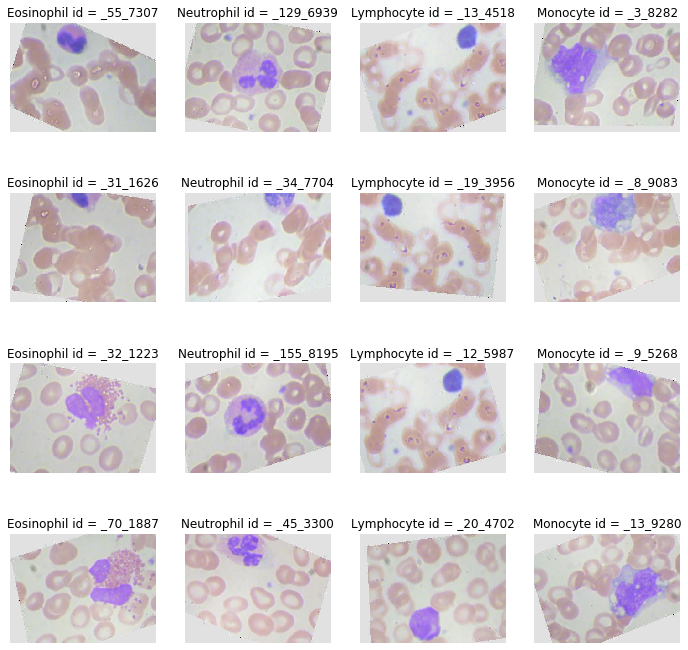

In [54]:
plot_aug(path_train_augm_c)

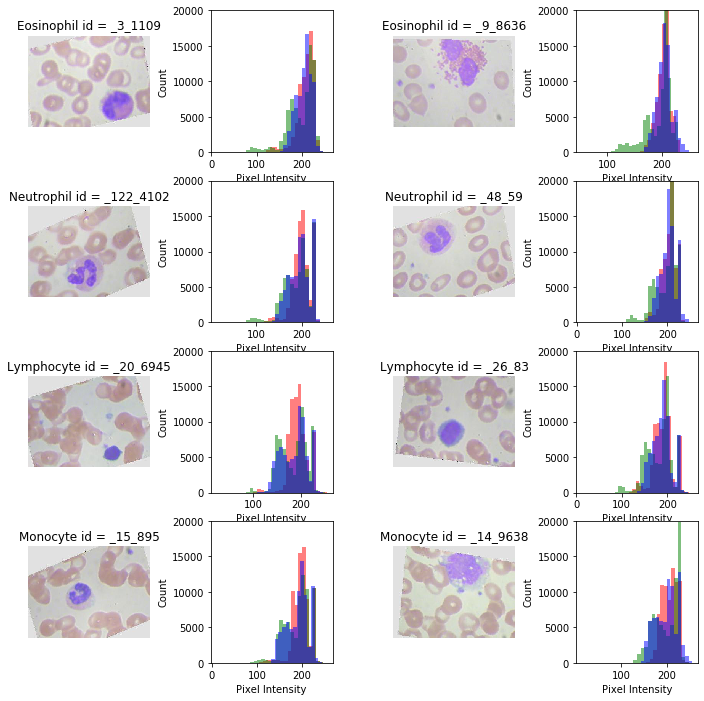

In [55]:
# plot some examples and their color histograms

fig, axes = plt.subplots(ncols=4, nrows=4, figsize=(12, 12))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=None)

m1 = m2 = m3 = m4 = 6
# first category 
current_id = id_eosinophil_aug[m1]
img = io.imread(path_train_augm_c[0] + str(current_id) + '.jpeg')
title = "Eosinophil id = " + current_id
plot_histogram(img,0,0, title, 20000)
current_id = id_eosinophil_aug[m1+5]
img = io.imread(path_train_augm_c[0] + str(current_id) + '.jpeg')
title = "Eosinophil id = " + current_id
plot_histogram(img,0,2, title, 20000)
# second category
current_id = id_neutrophil_aug[m2]
img = io.imread(path_train_augm_c[1] + str(current_id) + '.jpeg')
title = "Neutrophil id = " + current_id
plot_histogram(img,1,0,title, 20000)
current_id = id_neutrophil_aug[m2+5]
img = io.imread(path_train_augm_c[1] + str(current_id) + '.jpeg')
title = "Neutrophil id = " + current_id
plot_histogram(img,1,2,title, 20000)
# third category
current_id = id_lymphocyte_aug[m3]
img = io.imread(path_train_augm_c[2] + str(current_id) + '.jpeg')
title = "Lymphocyte id = " + current_id
plot_histogram(img,2,0,title, 20000)
current_id = id_lymphocyte_aug[m3+5]
img = io.imread(path_train_augm_c[2] + str(current_id) + '.jpeg')
title = "Lymphocyte id = " + current_id
plot_histogram(img,2,2,title, 20000)
# fourth category
current_id = id_monocyte_aug[m4]
img = io.imread(path_train_augm_c[3] + str(current_id) + '.jpeg')
title = "Monocyte id = " + current_id
plot_histogram(img,3,0,title, 20000)
current_id = id_monocyte_aug[m4+5]
img = io.imread(path_train_augm_c[3] + str(current_id) + '.jpeg')
title = "Monocyte id = " + current_id
plot_histogram(img,3,2,title, 20000)


## Principal Component Analysis

We changed the background color of the images in order to avoid problems in the principal component analysis (PCA). Next we compare the results of the PCA on the original augmented images with the color changed ones. We perform the PCA on both datasets and compare the eigenvectors and their explained variances. 

### Original augmented Images

PCA on augmented images with black margins. The first three components are dominant. They reflect the pattern of the black margin. The rest of the image has very low explained variance. Looking at the first 20 components, we can see that the eigenvectors hardly show any interesting pattern and the reconstruction from these components does not show any pattern, less when we only use the first three components.

In [56]:
blood_aug.iloc[:,0:14400].head()

0      1      2      \
dataset2-master/dataset2-master/images/TRAIN/tr...    0.0    0.0    0.0   
dataset2-master/dataset2-master/images/TRAIN/tr...    0.0    0.0    0.0   
dataset2-master/dataset2-master/images/TRAIN/tr...    0.0    0.0    0.0   
dataset2-master/dataset2-master/images/TRAIN/tr...    0.0    0.0    0.0   
dataset2-master/dataset2-master/images/TRAIN/tr...    0.0    0.0    0.0   

                                                    3      4      5      \
dataset2-master/dataset2-master/images/TRAIN/tr...    0.0    0.0    0.0   
dataset2-master/dataset2-master/images/TRAIN/tr...    0.0    0.0    0.0   
dataset2-master/dataset2-master/images/TRAIN/tr...    0.0    0.0    0.0   
dataset2-master/dataset2-master/images/TRAIN/tr...    0.0    0.0    0.0   
dataset2-master/dataset2-master/images/TRAIN/tr...    0.0    0.0    0.0   

                                                    6      7      8      \
dataset2-master/dataset2-master/images/TRAIN/tr...    0.0    0.0    0.0   
dataset2-master/dataset2-master/images/TRAIN/tr...    0.0    0.0    0.0   
dataset2-master/dataset2-master/images/TRAIN/tr...    0.0    0.0    0.0   
dataset2-master/dataset2-master/images/TRAIN/tr...    0.0    0.0    0.0   
dataset2-master/dataset2-master/images/TRAIN/tr...    0.0    0.0    0.0   

                                                    9      ...     14390  \
dataset2-master/dataset2-master/images/TRAIN/tr...    0.0  ...  0.659804   
dataset2-master/dataset2-master/images/TRAIN/tr...    0.0  ...  0.752941   
dataset2-master/dataset2-master/images/TRAIN/tr...    0.0  ...  0.774510   
dataset2-master/dataset2-master/images/TRAIN/tr...    0.0  ...  0.000000   
dataset2-master/dataset2-master/images/TRAIN/tr...    0.0  ...  0.000000   

                                                       14391     14392  \
dataset2-master/dataset2-master/images/TRAIN/tr...  0.746078  0.653922   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.742157  0.759804   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.797059  0.781373   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.000000  0.000000   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.000000  0.000000   

                                                       14393     14394  \
dataset2-master/dataset2-master/images/TRAIN/tr...  0.627451  0.309804   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.750980  0.741176   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.752941  0.793137   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.000000  0.000000   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.000000  0.000000   

                                                       14395     14396  \
dataset2-master/dataset2-master/images/TRAIN/tr...  0.264706  0.254902   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.756863  0.756863   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.762745  0.739216   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.000000  0.000000   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.000000  0.000000   

                                                       14397     14398  \
dataset2-master/dataset2-master/images/TRAIN/tr...  0.018627  0.016667   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.741176  0.756863   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.774510  0.728431   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.000000  0.000000   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.000000  0.000000   

                                                       14399  
dataset2-master/dataset2-master/images/TRAIN/tr...  0.026471  
dataset2-master/dataset2-master/images/TRAIN/tr...  0.764706  
dataset2-master/dataset2-master/images/TRAIN/tr...  0.727451  
dataset2-master/dataset2-master/images/TRAIN/tr...  0.000000  
dataset2-master/dataset2-master/images/TRAIN/tr...  0.000000  

[5 rows x 14400 columns]

In [57]:
# pca on augmented images (with black margin)
X = blood_aug.iloc[:,0:14400]
blood_aug_pca = PCA(n_components=0.8,svd_solver = 'full')
#blood_pca = PCA(n_components=3,svd_solver = 'full')
blood_aug_pca.fit(X)
transformed_X = blood_aug_pca.transform(X)
print("Shape of X before PCA: " + str(X.shape))
print("Shape of X after PCA: " + str(transformed_X.shape))

Shape of X before PCA: (9957, 14400)
Shape of X after PCA: (9957, 32)


In [58]:
# explained variances
blood_aug_pca.explained_variance_ratio_

array([0.16788284, 0.13895896, 0.13353895, 0.04537824, 0.04299481,
       0.03667129, 0.02754947, 0.02603498, 0.02224489, 0.01919706,
       0.01436199, 0.01274219, 0.01016526, 0.00956279, 0.00874466,
       0.00850922, 0.00742286, 0.00652624, 0.00620364, 0.00597633,
       0.00563951, 0.00524324, 0.00494709, 0.00461924, 0.00422045,
       0.00412604, 0.00395811, 0.00387255, 0.00372086, 0.00363424,
       0.00332032, 0.00318984])

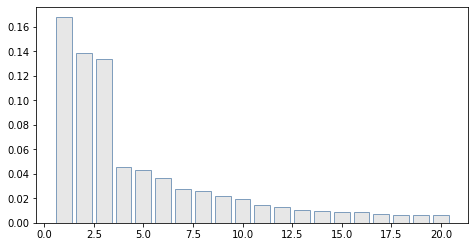

In [59]:
#importance of components
#plot explained variances of first 20 components
fig, axes = plt.subplots(1,1,figsize=(6,3))
plt.setp(axes, xticks=[1,3,5,7,9,11,13,15,17,19], xticklabels=['1', '3', '5','7','9','11','13','15','17','19'],
        yticks=[1, 2, 3])
x = np.arange(1,21,1)
color = (0.1, 0.1, 0.1, 0.1)
edgecolor = (0.2, 0.4, 0.6, 0.6)
axes = fig.add_axes([0,0,1,1])
axes.bar(x, height=blood_aug_pca.explained_variance_ratio_[0:20], color=color,  edgecolor=edgecolor);

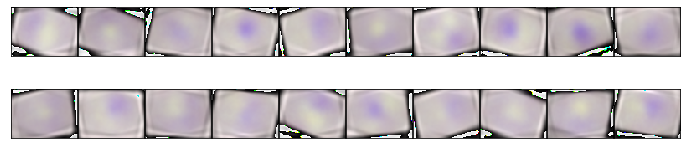

In [60]:
# reconstructed images from pca
pca_aug_projected = blood_aug_pca.inverse_transform(transformed_X)

fig, axes = plt.subplots(2, 10,figsize=(12,3), subplot_kw={'xticks':[], 'yticks':[]},
            gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
    img = pca_aug_projected[i].reshape(60,80,3)
    ax.imshow((img * 255).astype(np.uint8))

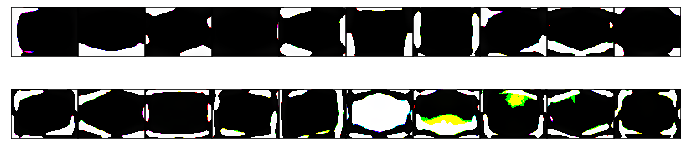

In [61]:
# eigenvectors
fig, axes = plt.subplots(2,10,figsize=(12,3),
subplot_kw={'xticks':[], 'yticks':[]},
gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
    img = blood_aug_pca.components_[i].reshape(60,80,3)
    ax.imshow((img * 255).astype(np.uint8),cmap='gray')

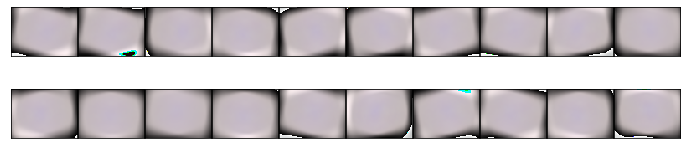

In [62]:
# reconstruct images with only the first 3 components
#PCA reconstruction=PC scores⋅Eigenvectors⊤+Mean
#pca_re = blood_pca.components_[0]*blood_pca.singular_values_[0] +blood_pca.mean_[0]
pca_aug_re = np.dot(blood_aug_pca.transform(X)[:,:3], blood_aug_pca.components_[:3,:])
pca_aug_re += blood_aug_pca.mean_

fig, axes = plt.subplots(2, 10,figsize=(12,3), subplot_kw={'xticks':[], 'yticks':[]},
            gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
    img = pca_aug_re[i].reshape(60,80,3)
    ax.imshow((img * 255).astype(np.uint8))

### Background-color changed augmented Images

In contrast to the original images, we don't have the first three components dominating, the explained variances are much closer to each other. The reconstruction of these 20 components already show a purple color in shape of the cell. The eigenvectors show much more dynamic patterns. Using only the first three components for reconstruction does not show any margins. Of course for a good reconstruction we will have to use more components.

In [63]:
blood_col.iloc[:,0:14400].head()

0         1      \
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   

                                                       2         3      \
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   

                                                       4         5      \
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   

                                                       6         7      \
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   

                                                       8         9      ...  \
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353  ...   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353  ...   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353  ...   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353  ...   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353  ...   

                                                       14390     14391  \
dataset2-master/dataset2-master/images/TRAIN/tr...  0.659804  0.754902   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.752941  0.742157   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.774510  0.797059   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   

                                                       14392     14393  \
dataset2-master/dataset2-master/images/TRAIN/tr...  0.667647  0.640196   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.759804  0.750980   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.781373  0.752941   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   

                                                       14394     14395  \
dataset2-master/dataset2-master/images/TRAIN/tr...  0.822549  0.791176   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.741176  0.756863   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.793137  0.762745   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   

                                                       14396     14397  \
dataset2-master/dataset2-master/images/TRAIN/tr...  0.771569  0.861765   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.756863  0.741176   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.739216  0.774510   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   
dataset2-master/dataset2-master/images/TRAIN/tr...  0.882353  0.882353   

                    

In [64]:
# pca on augmented images (with black margin)
X = blood_col.iloc[:,0:14400]
blood_col_pca = PCA(n_components=0.8,svd_solver = 'full')
#blood_pca = PCA(n_components=3,svd_solver = 'full')
blood_col_pca.fit(X)
transformed_X = blood_col_pca.transform(X)
print("Shape of X before PCA: " + str(X.shape))
print("Shape of X after PCA: " + str(transformed_X.shape))

Shape of X before PCA: (9957, 14400)
Shape of X after PCA: (9957, 146)


In [65]:
# explained variances
blood_col_pca.explained_variance_ratio_

array([0.08509433, 0.05413226, 0.04043704, 0.0346093 , 0.02601542,
       0.02308868, 0.02265868, 0.0184757 , 0.0164644 , 0.01548135,
       0.01503459, 0.013933  , 0.01378614, 0.01350986, 0.0115636 ,
       0.01089246, 0.01049097, 0.01013635, 0.00950914, 0.00896084,
       0.00834727, 0.00808107, 0.00792218, 0.00776805, 0.00748223,
       0.0071542 , 0.00711828, 0.00667752, 0.00632218, 0.00625754,
       0.00603192, 0.00593419, 0.00574241, 0.00538099, 0.00530987,
       0.00522397, 0.00510569, 0.00504461, 0.00497218, 0.00459729,
       0.00449853, 0.00440873, 0.00431695, 0.00428502, 0.0042277 ,
       0.00414966, 0.00408096, 0.00403941, 0.00397999, 0.0038823 ,
       0.00384458, 0.0038092 , 0.00377797, 0.00363506, 0.00352722,
       0.00344849, 0.00341701, 0.00336115, 0.00327079, 0.003179  ,
       0.00313579, 0.00296613, 0.00294982, 0.00288127, 0.00281067,
       0.00275527, 0.00273666, 0.00269012, 0.00267275, 0.002633  ,
       0.00256432, 0.00253208, 0.00249988, 0.00246787, 0.00243

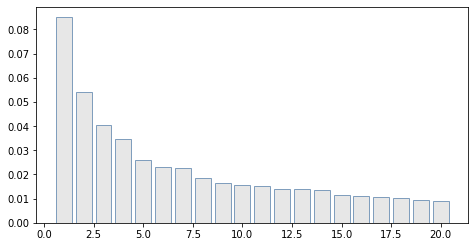

In [66]:
#importance of components
#plot explained variances of first 20 components
fig, axes = plt.subplots(1,1,figsize=(6,3))
plt.setp(axes, xticks=[1,3,5,7,9,11,13,15,17,19], xticklabels=['1', '3', '5','7','9','11','13','15','17','19'],
        yticks=[1, 2, 3])
x = np.arange(1,21,1)
color = (0.1, 0.1, 0.1, 0.1)
edgecolor = (0.2, 0.4, 0.6, 0.6)
axes = fig.add_axes([0,0,1,1])
axes.bar(x, height=blood_col_pca.explained_variance_ratio_[0:20], color=color,  edgecolor=edgecolor);

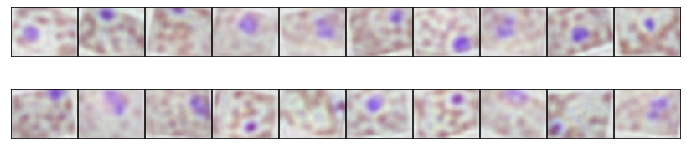

In [67]:
# reconstructed images from pca
pca_col_projected = blood_col_pca.inverse_transform(transformed_X)

fig, axes = plt.subplots(2, 10,figsize=(12,3), subplot_kw={'xticks':[], 'yticks':[]},
            gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
    img = pca_col_projected[i].reshape(60,80,3)
    ax.imshow((img * 255).astype(np.uint8))

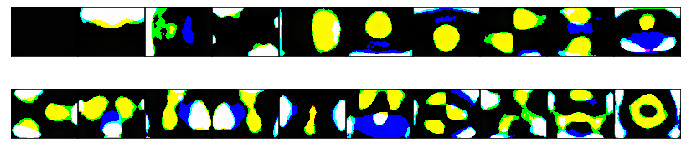

In [68]:
# eigenvectors
fig, axes = plt.subplots(2,10,figsize=(12,3),
subplot_kw={'xticks':[], 'yticks':[]},
gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
    img = blood_col_pca.components_[i].reshape(60,80,3)
    ax.imshow((img * 255).astype(np.uint8),cmap='gray')

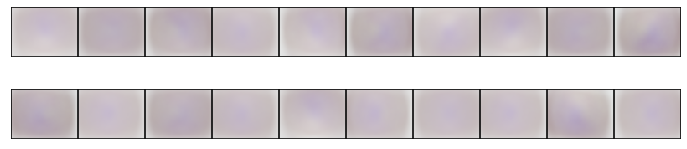

In [69]:
# reconstruct images with only the first 3 components
#PCA reconstruction=PC scores⋅Eigenvectors⊤+Mean
#pca_re = blood_pca.components_[0]*blood_pca.singular_values_[0] +blood_pca.mean_[0]
pca_col_re = np.dot(blood_col_pca.transform(X)[:,:3], blood_col_pca.components_[:3,:])
pca_col_re += blood_col_pca.mean_

fig, axes = plt.subplots(2, 10,figsize=(12,3), subplot_kw={'xticks':[], 'yticks':[]},
            gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
    img = pca_col_re[i].reshape(60,80,3)
    ax.imshow((img * 255).astype(np.uint8))

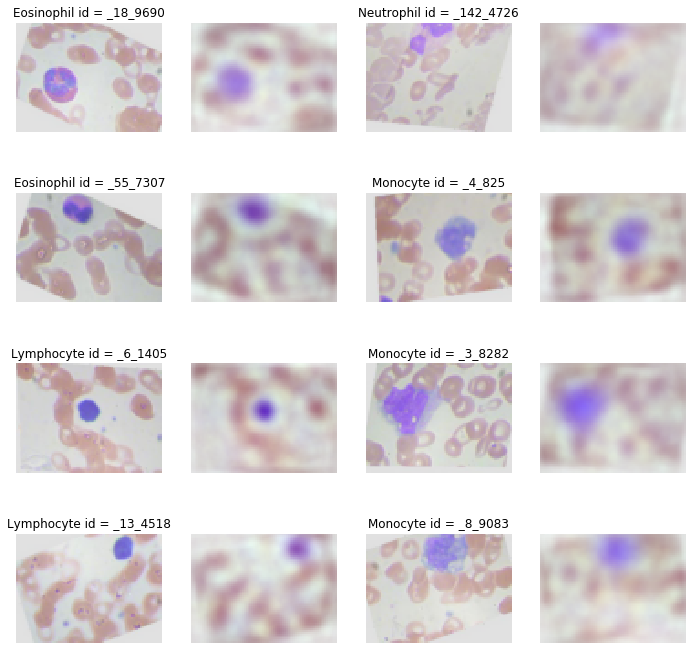

In [73]:
# plot some images before and after pca

X = blood_col.iloc[:,0:14400]

fig, axes = plt.subplots(ncols=4, nrows=4, figsize=(12, 12))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
n = 16
m1 = m2 = m3 = m4 = 0

for i in range(blood_col.shape[0]):
    if (blood_col.iloc[i,14401] == 1) & (m1<2): # first category  # & (i in train_index)
        m1 += 1
        current_id = blood_col.iloc[i,14400]         
        axes[m1-1,0].set_title("Eosinophil id = " + current_id)
        img = np.asarray(blood_col.iloc[i,0:14400]).reshape(60,80,3)
        axes[m1-1,0].imshow((img * 255).astype(np.uint8))
        axes[m1-1,0].axis('off')

        img = pca_col_projected[i].reshape(60,80,3)
        axes[m1-1,1].imshow((img * 255).astype(np.uint8))
        axes[m1-1,1].axis('off')
                          
    if (blood_col.iloc[i,14401] == 2) & (m2<=1): # second category
        m2 += 1
        current_id = blood_col.iloc[i,14400]         
        axes[m2-1,2].set_title("Neutrophil id = " + current_id)
        img = np.asarray(blood_col.iloc[i,0:14400]).reshape(60,80,3)
        axes[m2-1,2].imshow((img * 255).astype(np.uint8))
        axes[m2-1,2].axis('off')

        img = pca_col_projected[i].reshape(60,80,3)
        axes[m2-1,3].imshow((img * 255).astype(np.uint8))
        axes[m2-1,3].axis('off')

    if (blood_col.iloc[i,14401] == 3) & (m3<=1): # third category
        m3 += 1
        current_id = blood_col.iloc[i,14400]         
        axes[m3+1,0].set_title("Lymphocyte id = " + current_id)
        img = np.asarray(blood_col.iloc[i,0:14400]).reshape(60,80,3)
        axes[m3+1,0].imshow((img * 255).astype(np.uint8))
        axes[m3+1,0].axis('off')
                          
        img = pca_col_projected[i].reshape(60,80,3)
        axes[m3+1,1].imshow((img * 255).astype(np.uint8))        
        axes[m3+1,1].axis('off')
        
    if (blood_col.iloc[i,14401] == 4) & (m4<=2): # fourth category
        m4 += 1
        current_id = blood_col.iloc[i,14400]         
        axes[m4,2].set_title("Monocyte id = " + current_id)
        img = np.asarray(blood_col.iloc[i,0:14400]).reshape(60,80,3)
        axes[m4,2].imshow((img * 255).astype(np.uint8))
        axes[m4,2].axis('off')
                          
        img = pca_col_projected[i].reshape(60,80,3)
        axes[m4,3].imshow((img * 255).astype(np.uint8))        
        axes[m4,3].axis('off')
                          
    if(m1>=2 & m2>=2 & m3>2 & m4>2):
        break

In [ ]:
pca_col_re1 = np.dot(blood_col_pca.transform(X)[:,:4], blood_col_pca.components_[:4,:])
pca_col_re1 += blood_col_pca.mean_
pca_col_re2 = np.dot(blood_col_pca.transform(X)[:,:15], blood_col_pca.components_[:15,:])
pca_col_re2 += blood_col_pca.mean_
pca_col_re3 = np.dot(blood_col_pca.transform(X)[:,:44], blood_col_pca.components_[:44,:])
pca_col_re3 += blood_col_pca.mean_
pca_col_re4 = np.dot(blood_col_pca.transform(X), blood_col_pca.components_)
pca_col_re4 += blood_col_pca.mean_

fig, axes = plt.subplots(1, 5,figsize=(15,3), subplot_kw={'xticks':[], 'yticks':[]},
            gridspec_kw=dict(hspace=0.01, wspace=0.01))
img1 = pca_col_re1[0].reshape(60,80,3)
img2 = pca_col_re2[0].reshape(60,80,3)
img3 = pca_col_re3[0].reshape(60,80,3)
img4 = pca_col_re4[0].reshape(60,80,3)
img5 = np.asarray(blood_col.iloc[0,0:14400]).reshape(60,80,3)
axes[0].imshow((img1 * 255).astype(np.uint8))
axes[0].set_title('expl. variance: ' + str(round(sum(blood_col_pca.explained_variance_ratio_[0:4]),2)*100) + '%')
axes[1].imshow((img2 * 255).astype(np.uint8))
axes[1].set_title('expl. variance: ' + str(round(sum(blood_col_pca.explained_variance_ratio_[0:15]),2)*100) + '%')
axes[2].imshow((img3 * 255).astype(np.uint8))
axes[2].set_title('expl. variance: ' + str(round(sum(blood_col_pca.explained_variance_ratio_[0:44]),2)*100) + '%')
axes[3].imshow((img4 * 255).astype(np.uint8))
axes[3].set_title('expl. variance: ' + str(round(sum(blood_col_pca.explained_variance_ratio_),2)*100) + '%')
axes[4].imshow((img5 * 255).astype(np.uint8))
axes[4].set_title('original')

## Number of Images in each Class

Ckeck whether there are missing values and the number of images in each class. Since we first consider a binary classification we also have a look at the amount of granolucytes vs a granulocates and lymphocytes vs the rest. We see that all four classes are equally distributed 

In [70]:
# are there missing values?
blood_aug.dropna(inplace=True)
blood_aug.isna().sum()

0              0
1              0
2              0
3              0
4              0
              ..
classE         0
classN         0
classL         0
classM         0
granulocyte    0
Length: 14407, dtype: int64

In [91]:
# do the same for grayscale images (enough space?) - FOR THE MOMENT NOT!

Cell classes: [1 2 3 4]


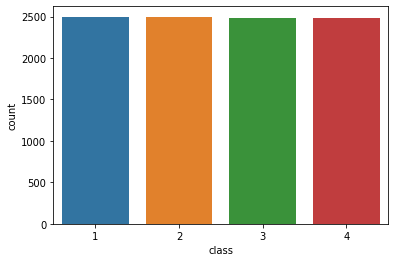

In [72]:
# number of examples per class
print("Cell classes: " + str(blood_aug["class"].unique()))
sns.countplot(x = blood_aug["class"]);

Granulocyte classes: [1 0]


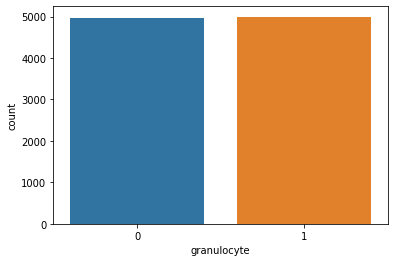

In [73]:
# number of images Granulocytes vs. Mononuclear
print("Granulocyte classes: " + str(blood_aug["granulocyte"].unique()))
sns.countplot(x = blood_aug["granulocyte"]);

Lymphocyte: [0 1]


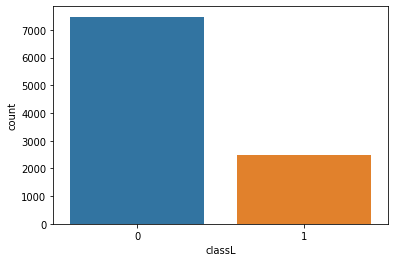

In [74]:
# number of images Lymphocytes vs. rest
print("Lymphocyte: " + str(blood_aug["classL"].unique()))
sns.countplot(x = blood_aug["classL"]);

# Test Data Set

In order to test our model for our test data the same preprocessing has to be done. However we assume that the folder and image names are in the same structure as for the test data.

In [31]:
# The Feature Engineering part also has to be done with the test data
# Process for Test data
# 1. colormask
# 2. change size
# 3. flatten and save in dataframe
# 4. add class labels
    
def read_id(input_path):
    id_image = []
    for path in iglob(input_path + '*.jpeg'):
        path_split= path.split("/")
        name = path_split[-1].split('.')[0]
        name2 = name.split('_')
        name3 = "_"+name2[1]+"_"+name2[2]
        id_image.append(name3)
    return id_image
            
def preprocess(list_image_path, csv_path):
    for i in range(len(list_image_path)):
        image_path = list_image_path[i] + '*.jpeg'
        print(image_path)
        cells = pd.DataFrame([])
        threshold = 90
        for path in iglob(image_path):
            #print(path)
            # read image
            img = io.imread(path)
            # change color
            gray = np.sum(img, axis=2).astype(int)
            img[gray < threshold] = 225
            img = img_as_ubyte(img)
            # save image with same name as input
            name = path.split("/")
            #print(name[-1])
            # change size
            img = resize(img, (60, 80, 3))
            # flatten and save in dataframe
            cell = pd.Series(img.flatten(),name=path)
            cells = cells.append(cell)
            # add class labels
            #set_label(path_test_augm, path_test_csv)
        if i==0:
            cells["id"] = read_id(list_image_path[i])
            cells["class"] = 1
            cells["classE"] = 1
            cells["classN"] = 0
            cells["classL"] = 0
            cells["classM"] = 0
            cells["granulocyte"] = 1
            cells.to_csv(path_test_csv + 'test_class1_E.csv')
        if i==1:
            cells["id"] = read_id(list_image_path[i])
            cells["class"] = 2
            cells["classE"] = 0
            cells["classN"] = 1
            cells["classL"] = 0
            cells["classM"] = 0
            cells["granulocyte"] = 1
            cells.to_csv(path_test_csv + 'test_class2_N.csv')
        if i==2:
            cells["id"] = read_id(list_image_path[i])
            cells["class"] = 3
            cells["classE"] = 0
            cells["classN"] = 0
            cells["classL"] = 1
            cells["classM"] = 0
            cells["granulocyte"] = 0
            cells.to_csv(path_test_csv + 'test_class3_L.csv')
        if i==3:
            cells["id"] = read_id(list_image_path[i])
            cells["class"] = 4
            cells["classE"] = 0
            cells["classN"] = 0
            cells["classL"] = 0
            cells["classM"] = 1
            cells["granulocyte"] = 0
            cells.to_csv(path_test_csv + 'test_class4_M.csv')
           

In [32]:
preprocess(path_test_augm, path_test_csv)

dataset2-master/dataset2-master/images/TEST/EOSINOPHIL/*.jpeg
0
dataset2-master/dataset2-master/images/TEST/EOSINOPHIL/*.jpeg
dataset2-master/dataset2-master/images/TEST/NEUTROPHIL/*.jpeg
dataset2-master/dataset2-master/images/TEST/LYMPHOCYTE/*.jpeg
dataset2-master/dataset2-master/images/TEST/MONOCYTE/*.jpeg


In [84]:
# read dataframes to check, if everything is ok
test_class1_df = pd.read_csv(path_test_csv+ 'test_class1_E.csv')
test_class1_df.head()

Unnamed: 0         0         1  \
0  dataset2-master/dataset2-master/images/TEST/EO...  0.797059  0.836275   
1  dataset2-master/dataset2-master/images/TEST/EO...  0.882353  0.882353   
2  dataset2-master/dataset2-master/images/TEST/EO...  0.792157  0.792157   
3  dataset2-master/dataset2-master/images/TEST/EO...  0.866667  0.864706   
4  dataset2-master/dataset2-master/images/TEST/EO...  0.882353  0.882353   

          2         3         4         5         6         7         8  ...  \
0  0.797059  0.806863  0.839216  0.801961  0.814706  0.842157  0.806863  ...   
1  0.882353  0.882353  0.882353  0.882353  0.882353  0.882353  0.882353  ...   
2  0.797059  0.787255  0.781373  0.782353  0.800000  0.786275  0.778431  ...   
3  0.864706  0.791176  0.749020  0.733333  0.756863  0.622549  0.590196  ...   
4  0.882353  0.882353  0.882353  0.882353  0.882353  0.882353  0.882353  ...   

      14397     14398     14399        id  class  classE  classN  classL  \
0  0.882353  0.882353  0.882353  _11_6757      1       1       0       0   
1  0.882353  0.882353  0.882353    _7_986      1       1       0       0   
2  0.882353  0.882353  0.882353   _3_9885      1       1       0       0   
3  0.882353  0.882353  0.882353  _11_3152      1       1       0       0   
4  0.799020  0.785294  0.768627   _2_1953      1       1       0       0   

   classM  granulocyte  
0       0            1  
1       0            1  
2       0            1  
3       0            1  
4       0            1  

[5 rows x 14408 columns]

In [85]:
# read dataframes to check, if everything is ok
test_class2_df = pd.read_csv(path_test_csv+ 'test_class2_N.csv')
test_class2_df.head()

Unnamed: 0         0         1  \
0  dataset2-master/dataset2-master/images/TEST/NE...  0.882353  0.882353   
1  dataset2-master/dataset2-master/images/TEST/NE...  0.882353  0.882353   
2  dataset2-master/dataset2-master/images/TEST/NE...  0.882353  0.882353   
3  dataset2-master/dataset2-master/images/TEST/NE...  0.876471  0.874510   
4  dataset2-master/dataset2-master/images/TEST/NE...  0.882353  0.882353   

          2         3         4         5         6         7         8  ...  \
0  0.882353  0.882353  0.882353  0.882353  0.882353  0.882353  0.882353  ...   
1  0.882353  0.882353  0.882353  0.882353  0.882353  0.882353  0.882353  ...   
2  0.882353  0.882353  0.882353  0.882353  0.882353  0.882353  0.882353  ...   
3  0.876471  0.876471  0.876471  0.876471  0.876471  0.876471  0.876471  ...   
4  0.882353  0.882353  0.882353  0.882353  0.882353  0.882353  0.882353  ...   

      14397     14398     14399        id  class  classE  classN  classL  \
0  0.798039  0.785294  0.741176   _7_7719      2       0       1       0   
1  0.739216  0.618627  0.581373  _32_8002      2       0       1       0   
2  0.882353  0.882353  0.882353  _10_4371      2       0       1       0   
3  0.767647  0.662745  0.678431  _11_2597      2       0       1       0   
4  0.882353  0.882353  0.882353   _47_240      2       0       1       0   

   classM  granulocyte  
0       0            1  
1       0            1  
2       0            1  
3       0            1  
4       0            1  

[5 rows x 14408 columns]

In [86]:
# read dataframes to check, if everything is ok
test_class3_df = pd.read_csv(path_test_csv+ 'test_class3_L.csv')
test_class3_df.head()

Unnamed: 0         0         1  \
0  dataset2-master/dataset2-master/images/TEST/LY...  0.882353  0.882353   
1  dataset2-master/dataset2-master/images/TEST/LY...  0.882353  0.882353   
2  dataset2-master/dataset2-master/images/TEST/LY...  0.679412  0.525490   
3  dataset2-master/dataset2-master/images/TEST/LY...  0.882353  0.882353   
4  dataset2-master/dataset2-master/images/TEST/LY...  0.768627  0.695098   

          2         3         4         5         6         7         8  ...  \
0  0.882353  0.882353  0.882353  0.882353  0.882353  0.882353  0.882353  ...   
1  0.882353  0.882353  0.882353  0.882353  0.882353  0.882353  0.882353  ...   
2  0.480392  0.674510  0.513725  0.507843  0.617647  0.444118  0.523529  ...   
3  0.882353  0.882353  0.882353  0.882353  0.882353  0.882353  0.882353  ...   
4  0.797059  0.750000  0.669608  0.773529  0.755882  0.667647  0.755882  ...   

      14397     14398     14399       id  class  classE  classN  classL  \
0  0.703922  0.592157  0.635294  _4_5321      3       0       0       1   
1  0.882353  0.882353  0.882353  _5_3197      3       0       0       1   
2  0.882353  0.882353  0.882353  _0_3531      3       0       0       1   
3  0.882353  0.882353  0.882353    _1_52      3       0       0       1   
4  0.882353  0.882353  0.882353  _2_7079      3       0       0       1   

   classM  granulocyte  
0       0            0  
1       0            0  
2       0            0  
3       0            0  
4       0            0  

[5 rows x 14408 columns]

In [87]:
# read dataframes to check, if everything is ok
test_class4_df = pd.read_csv(path_test_csv+ 'test_class4_M.csv')
test_class4_df.head()

Unnamed: 0         0         1  \
0  dataset2-master/dataset2-master/images/TEST/MO...  0.882353  0.882353   
1  dataset2-master/dataset2-master/images/TEST/MO...  0.772549  0.776471   
2  dataset2-master/dataset2-master/images/TEST/MO...  0.882353  0.882353   
3  dataset2-master/dataset2-master/images/TEST/MO...  0.882353  0.882353   
4  dataset2-master/dataset2-master/images/TEST/MO...  0.882353  0.882353   

          2         3         4         5         6         7         8  ...  \
0  0.882353  0.882353  0.882353  0.882353  0.882353  0.882353  0.882353  ...   
1  0.776471  0.778431  0.786275  0.764706  0.784314  0.758824  0.750000  ...   
2  0.882353  0.882353  0.882353  0.882353  0.882353  0.882353  0.882353  ...   
3  0.882353  0.882353  0.882353  0.882353  0.882353  0.882353  0.882353  ...   
4  0.882353  0.882353  0.882353  0.882353  0.882353  0.882353  0.882353  ...   

      14397     14398     14399       id  class  classE  classN  classL  \
0  0.878431  0.876471  0.878431  _3_1735      4       0       0       0   
1  0.868627  0.870588  0.868627  _0_5723      4       0       0       0   
2  0.882353  0.882353  0.882353  _3_3533      4       0       0       0   
3  0.882353  0.882353  0.882353  _1_5380      4       0       0       0   
4  0.882353  0.882353  0.882353  _1_2500      4       0       0       0   

   classM  granulocyte  
0       1            0  
1       1            0  
2       1            0  
3       1            0  
4       1            0  

[5 rows x 14408 columns]

In [15]:
preprocess(path_test_simple, path_test_simple_csv)

dataset2-master/dataset2-master/images/TEST_SIMPLE/EOSINOPHIL/*.jpg
dataset2-master/dataset2-master/images/TEST_SIMPLE/NEUTROPHIL/*.jpg
dataset2-master/dataset2-master/images/TEST_SIMPLE/LYMPHOCYTE/*.jpg
dataset2-master/dataset2-master/images/TEST_SIMPLE/MONOCYTE/*.jpg
